# Firebase

Firebase is a platform developed by Google that provides backend services for building web and mobile applications. It offers features like real-time databases, authentication, cloud storage, hosting, and machine learning integration. Firebase simplifies app development by handling backend infrastructure, enabling developers to focus on building great user experiences.

## Getting Start

1. Visit console.firebase.google.com (Click Get started with a Firebase project)

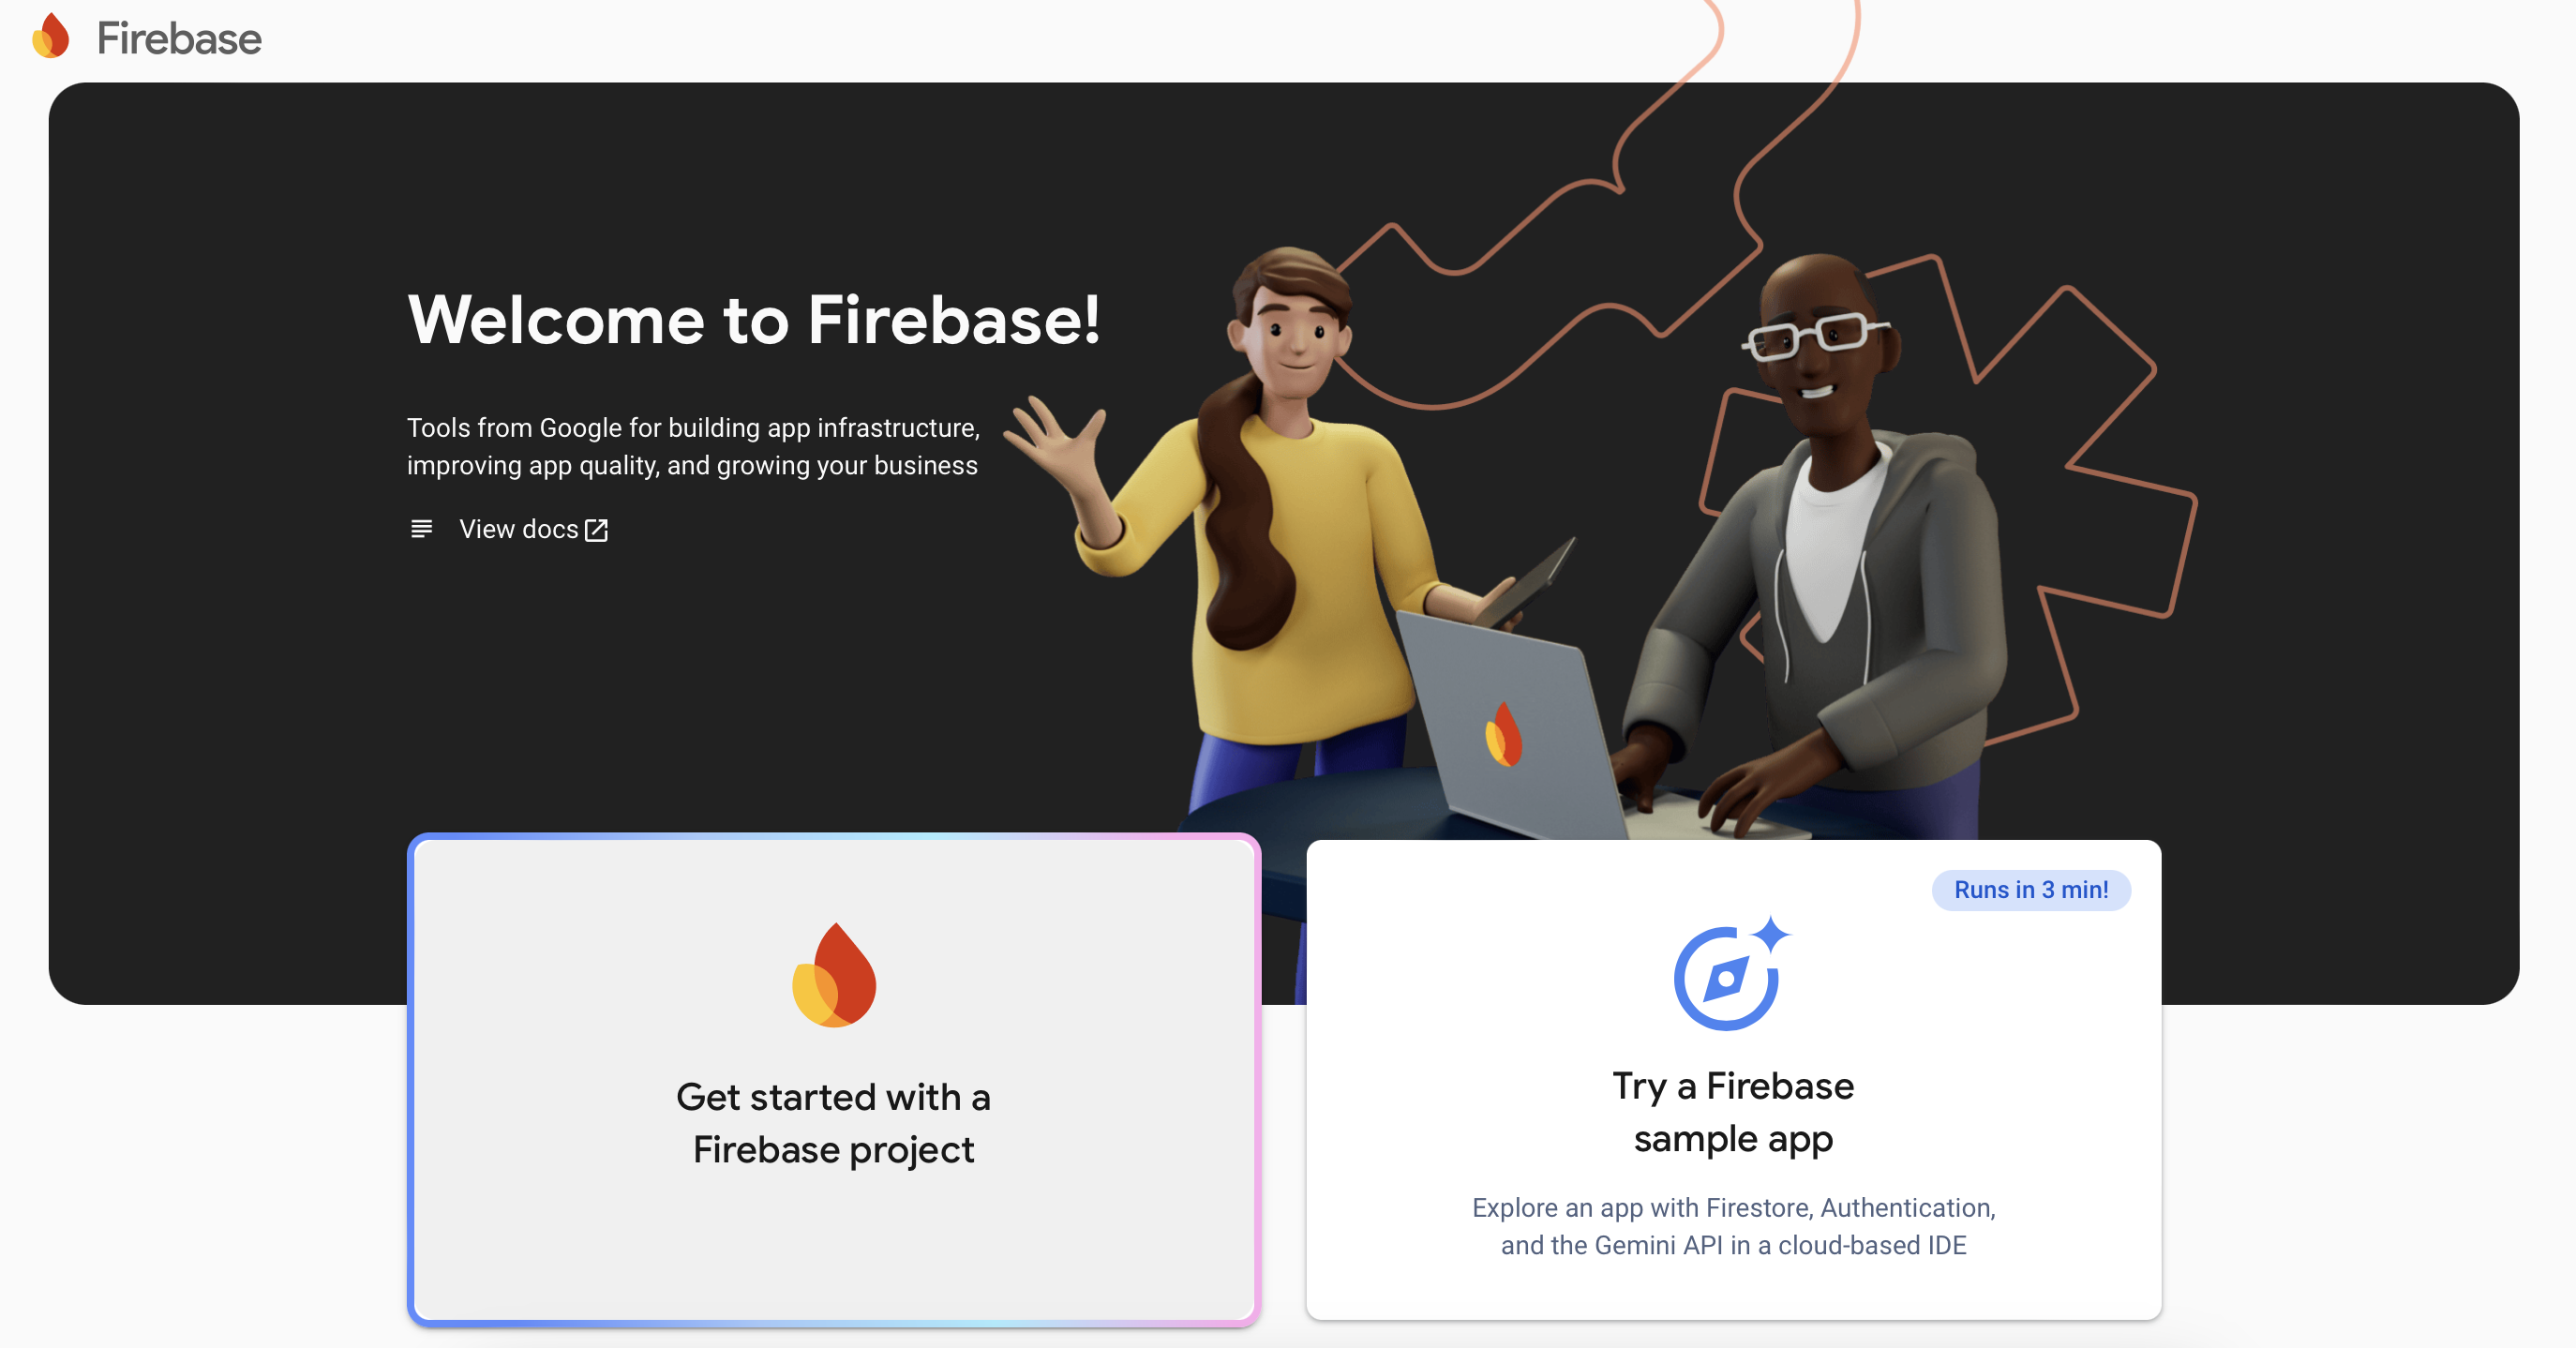

2. Enter your project name

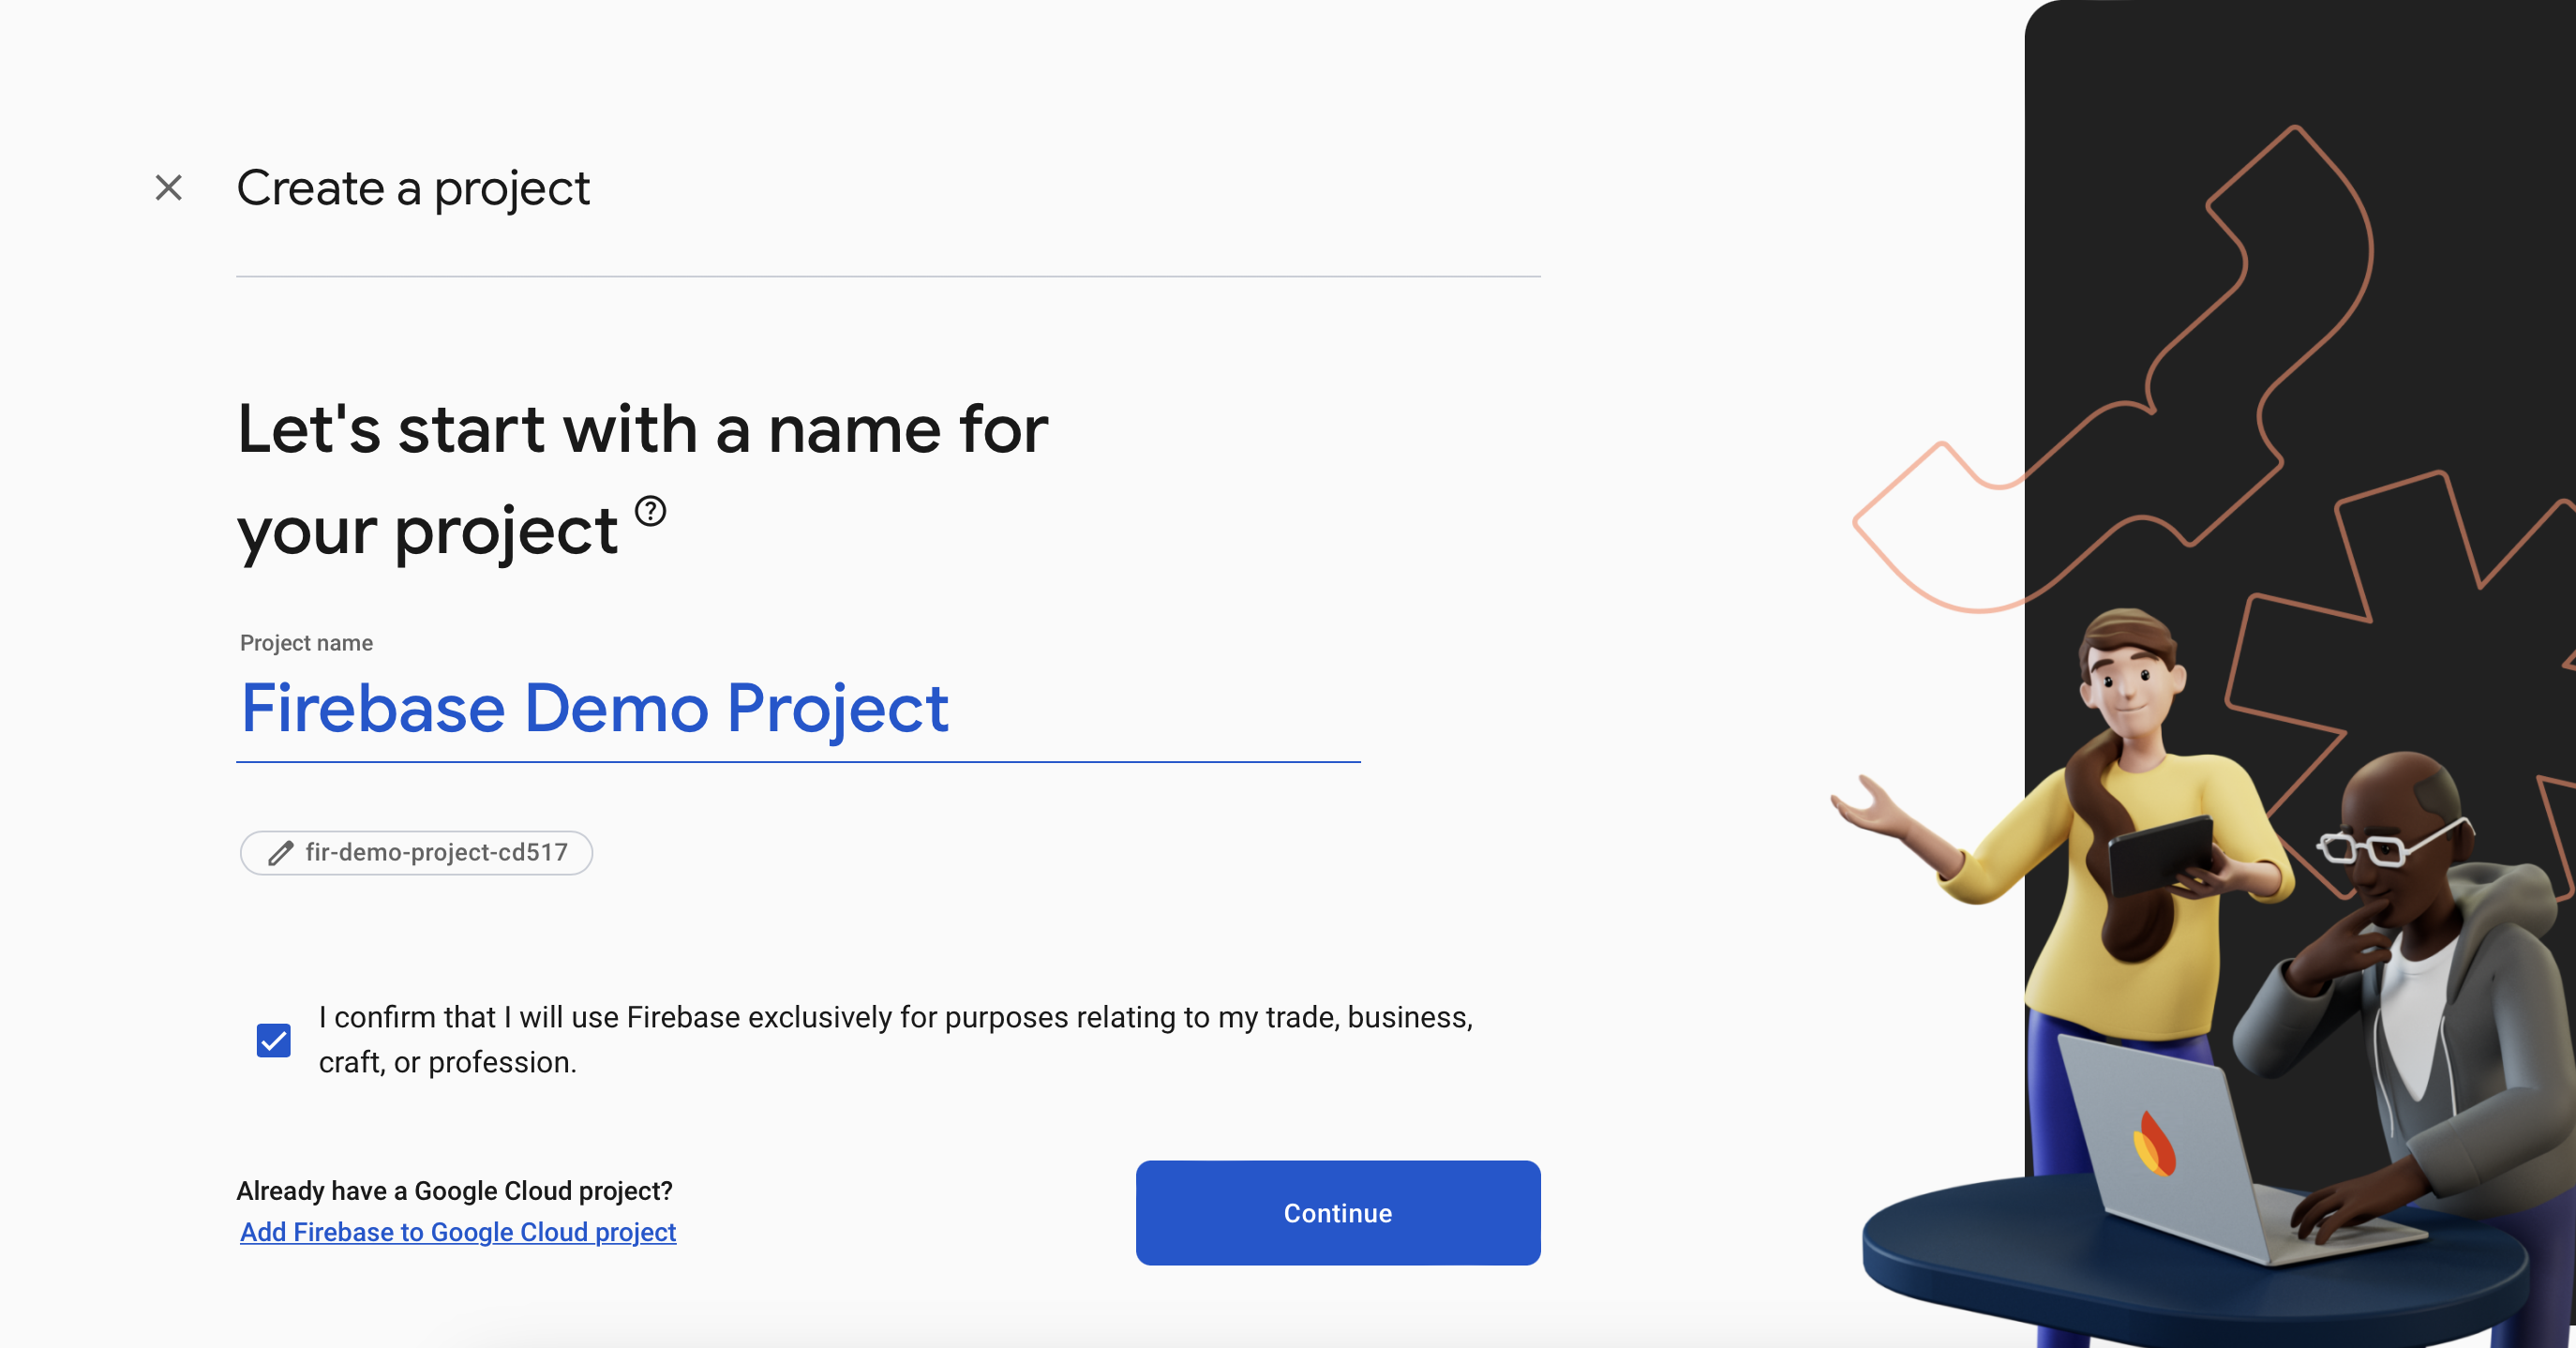

3. Click Continue

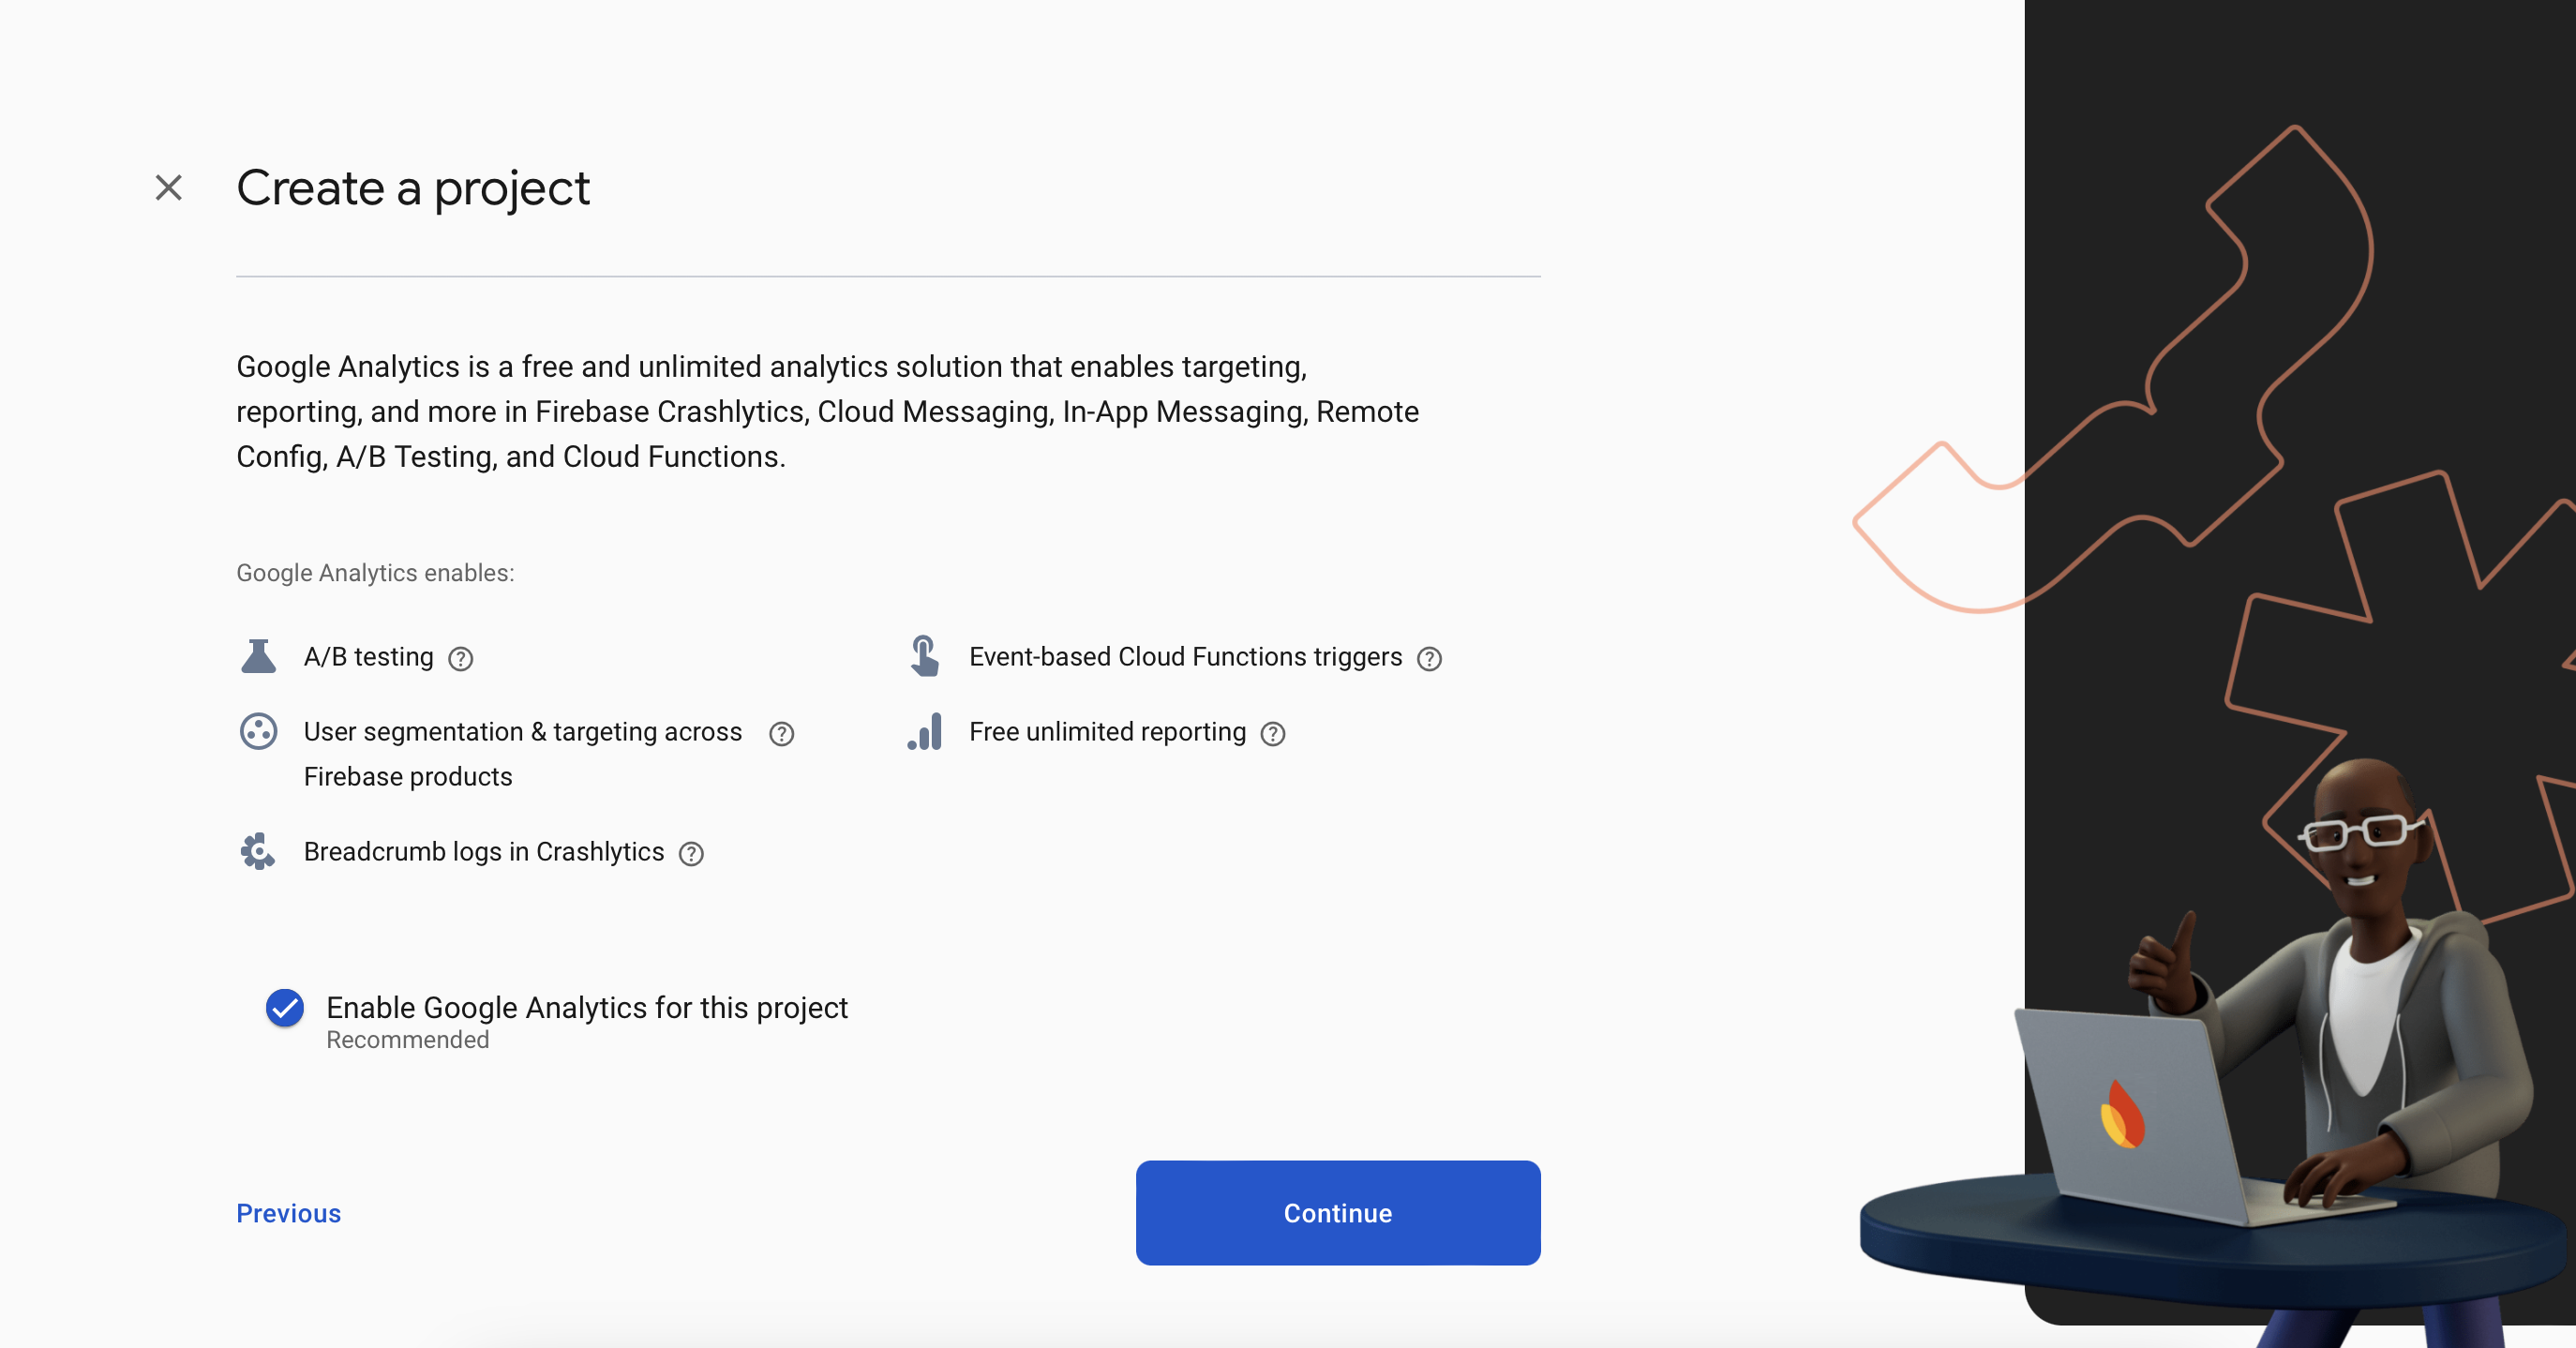

4. Create Project

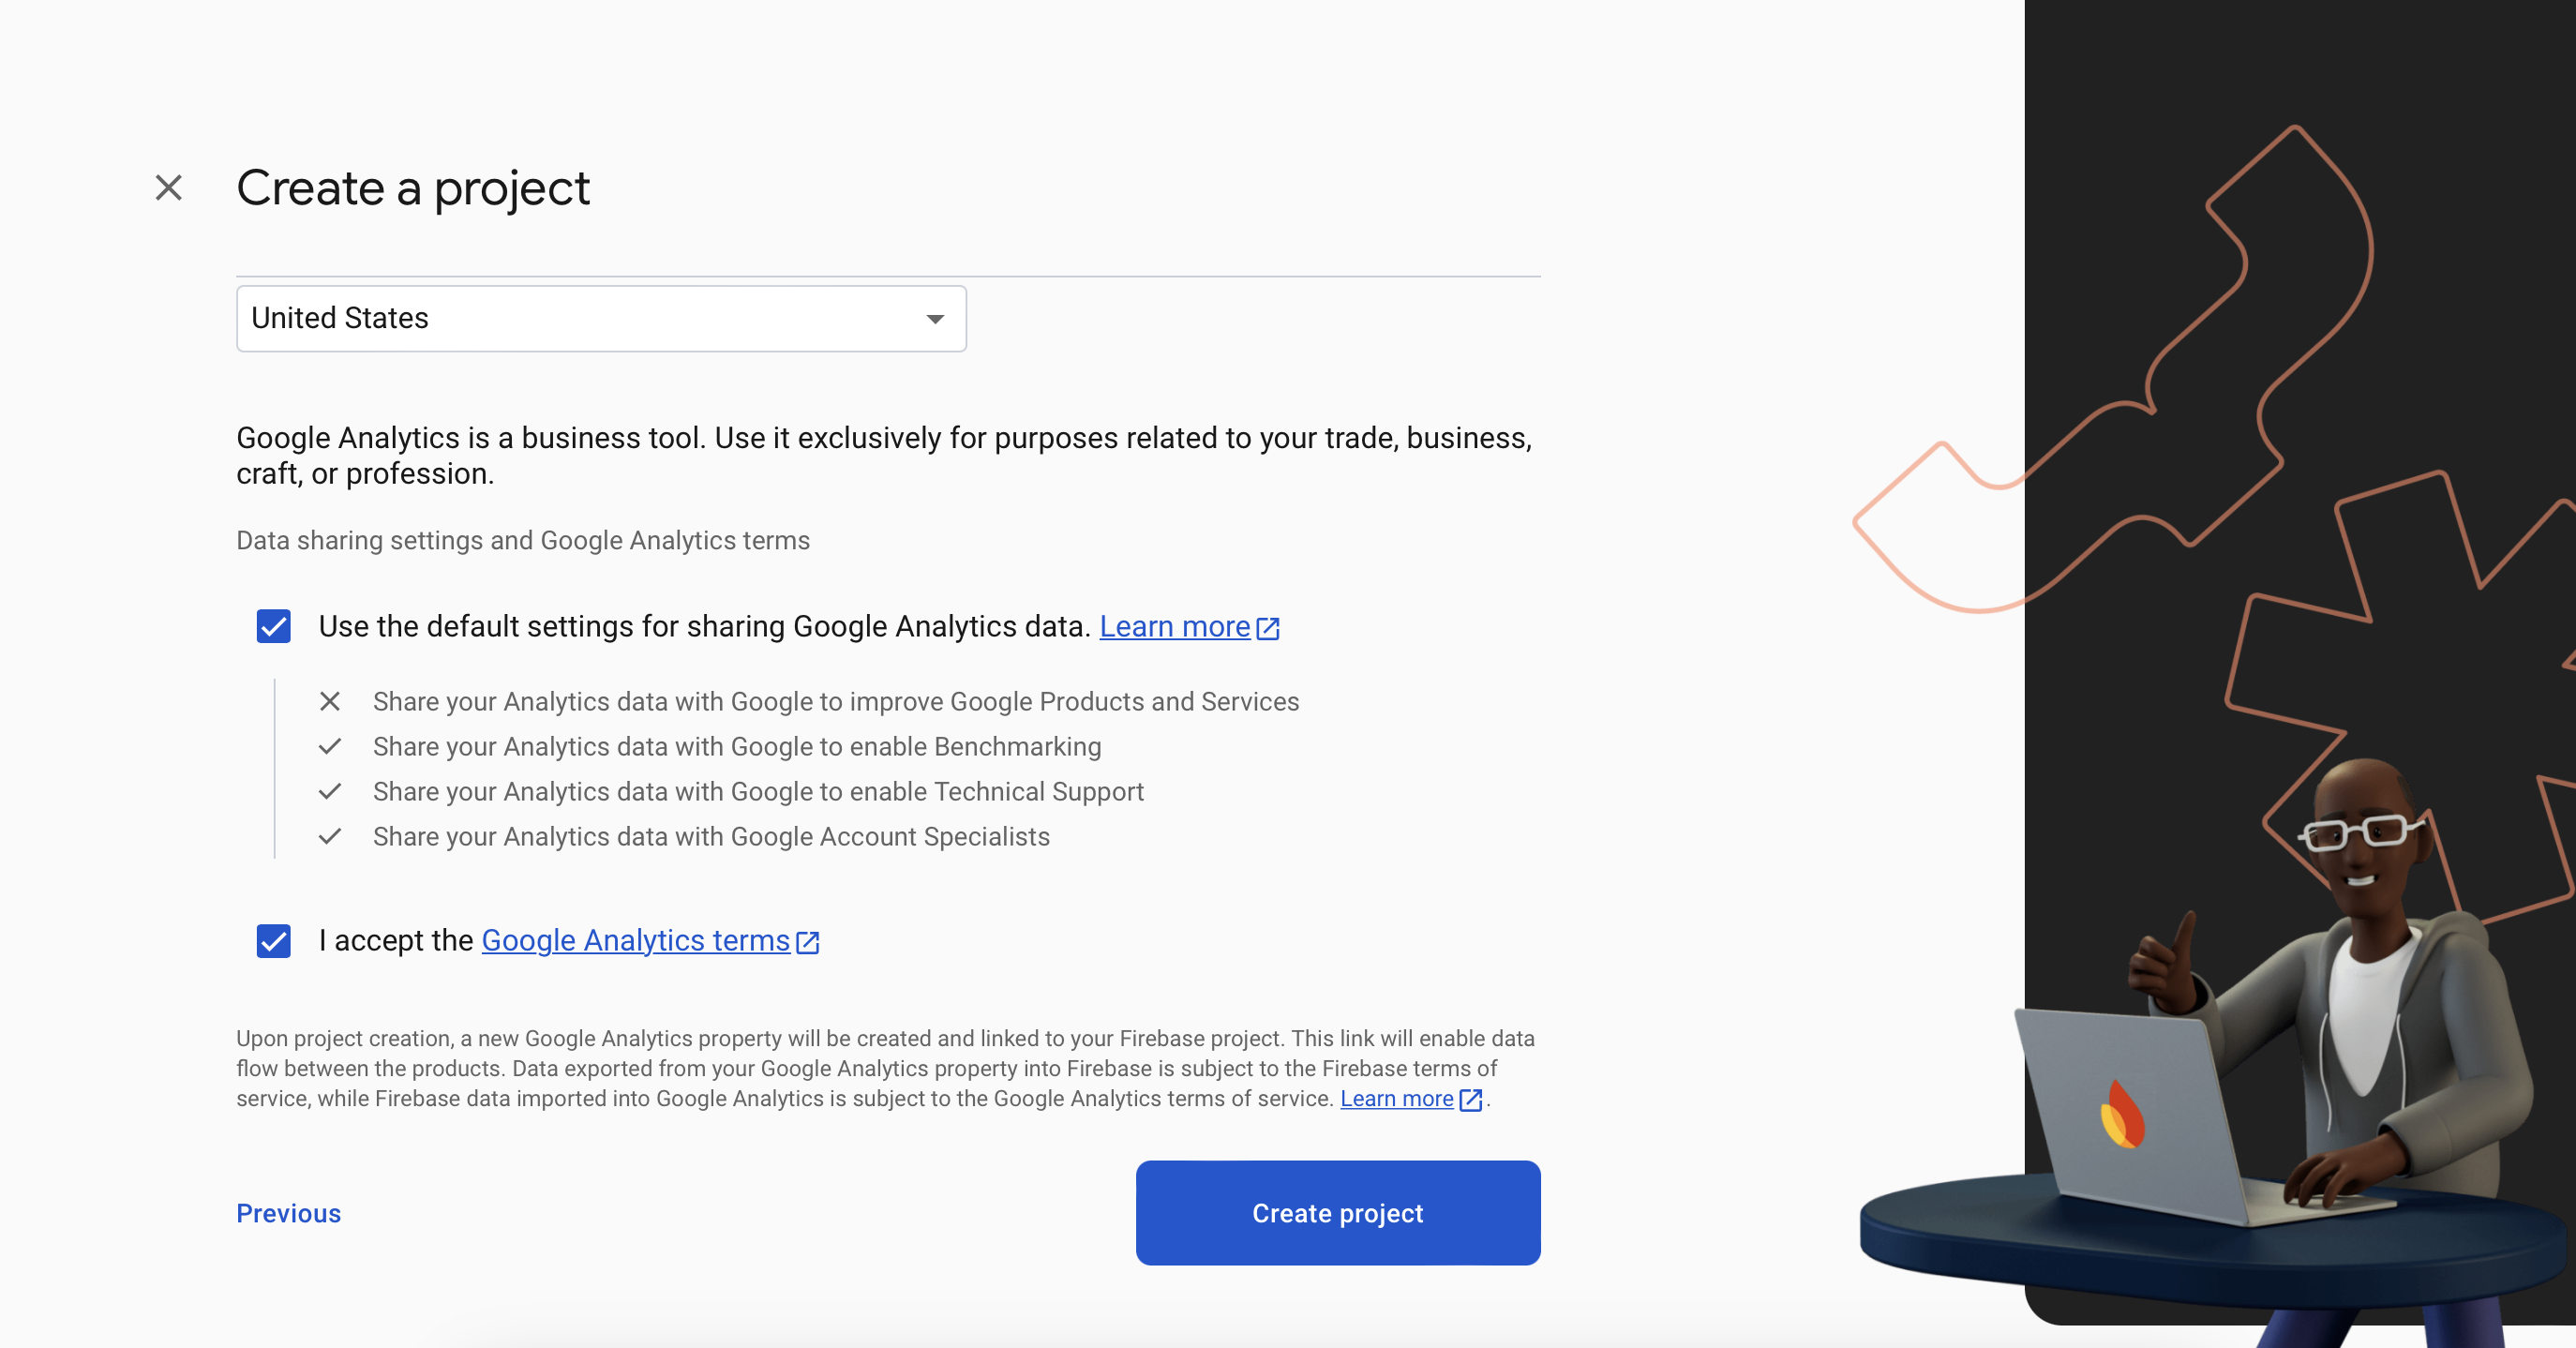

5. Continue

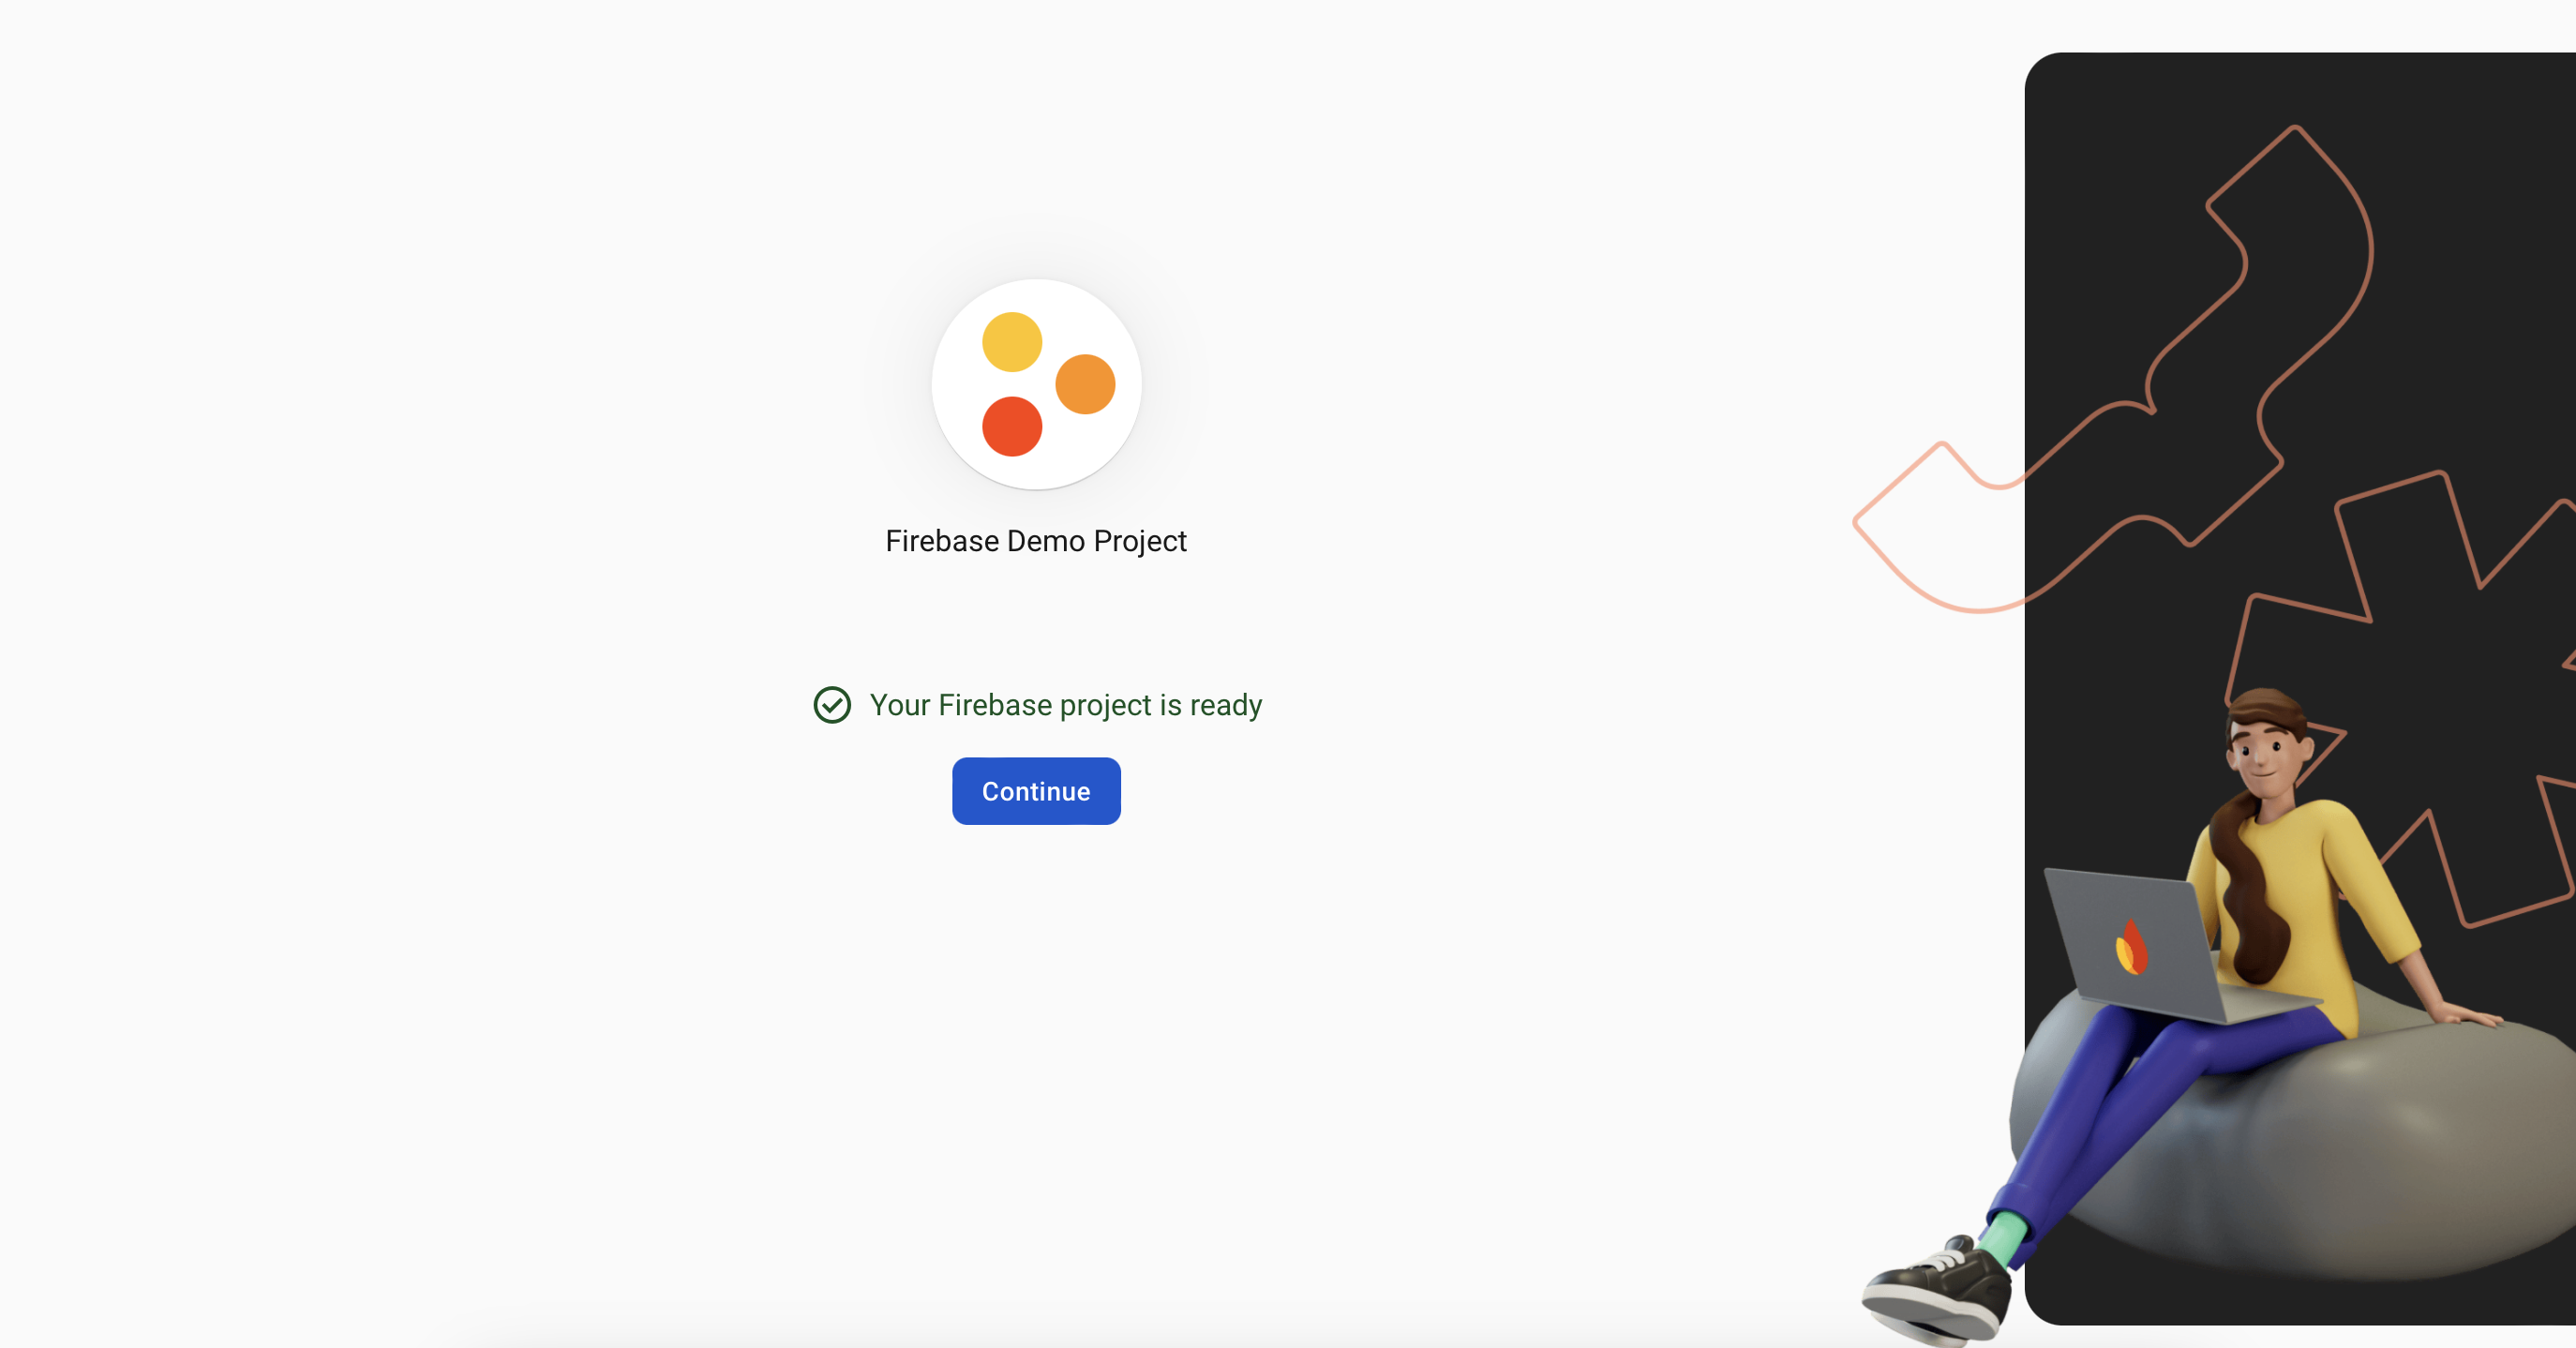

6. Choose Project Setting
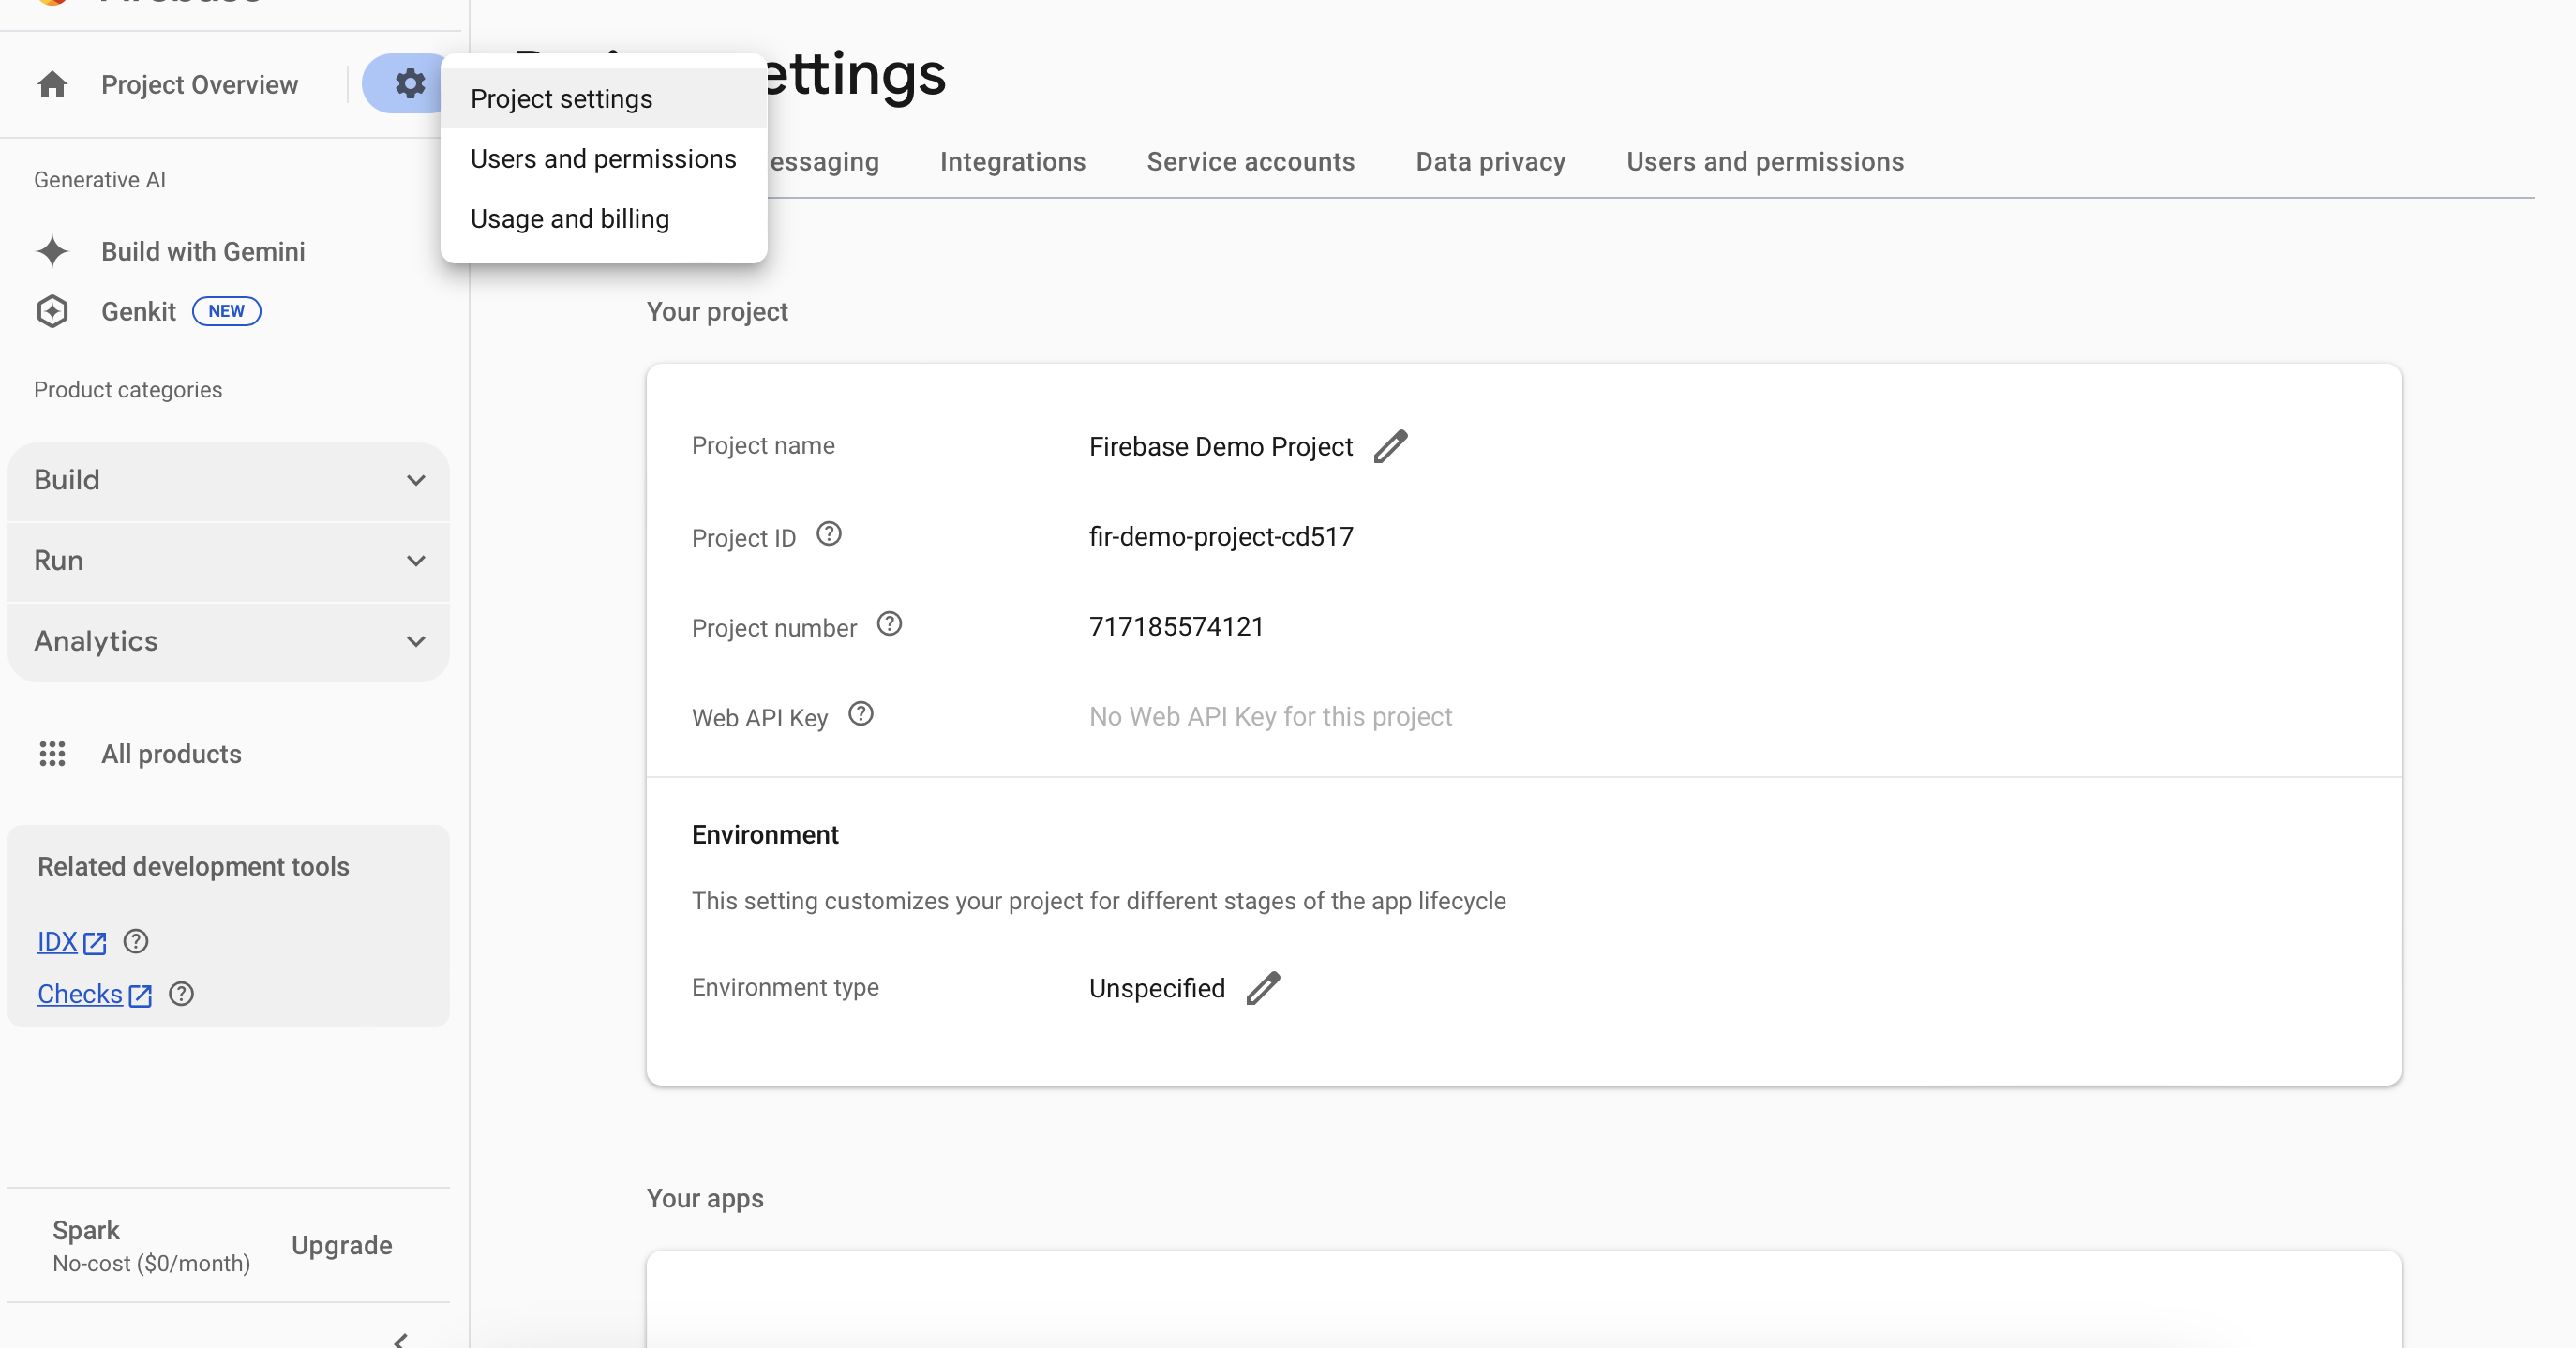

7. On Service Accounts Tab, click Generate new private key

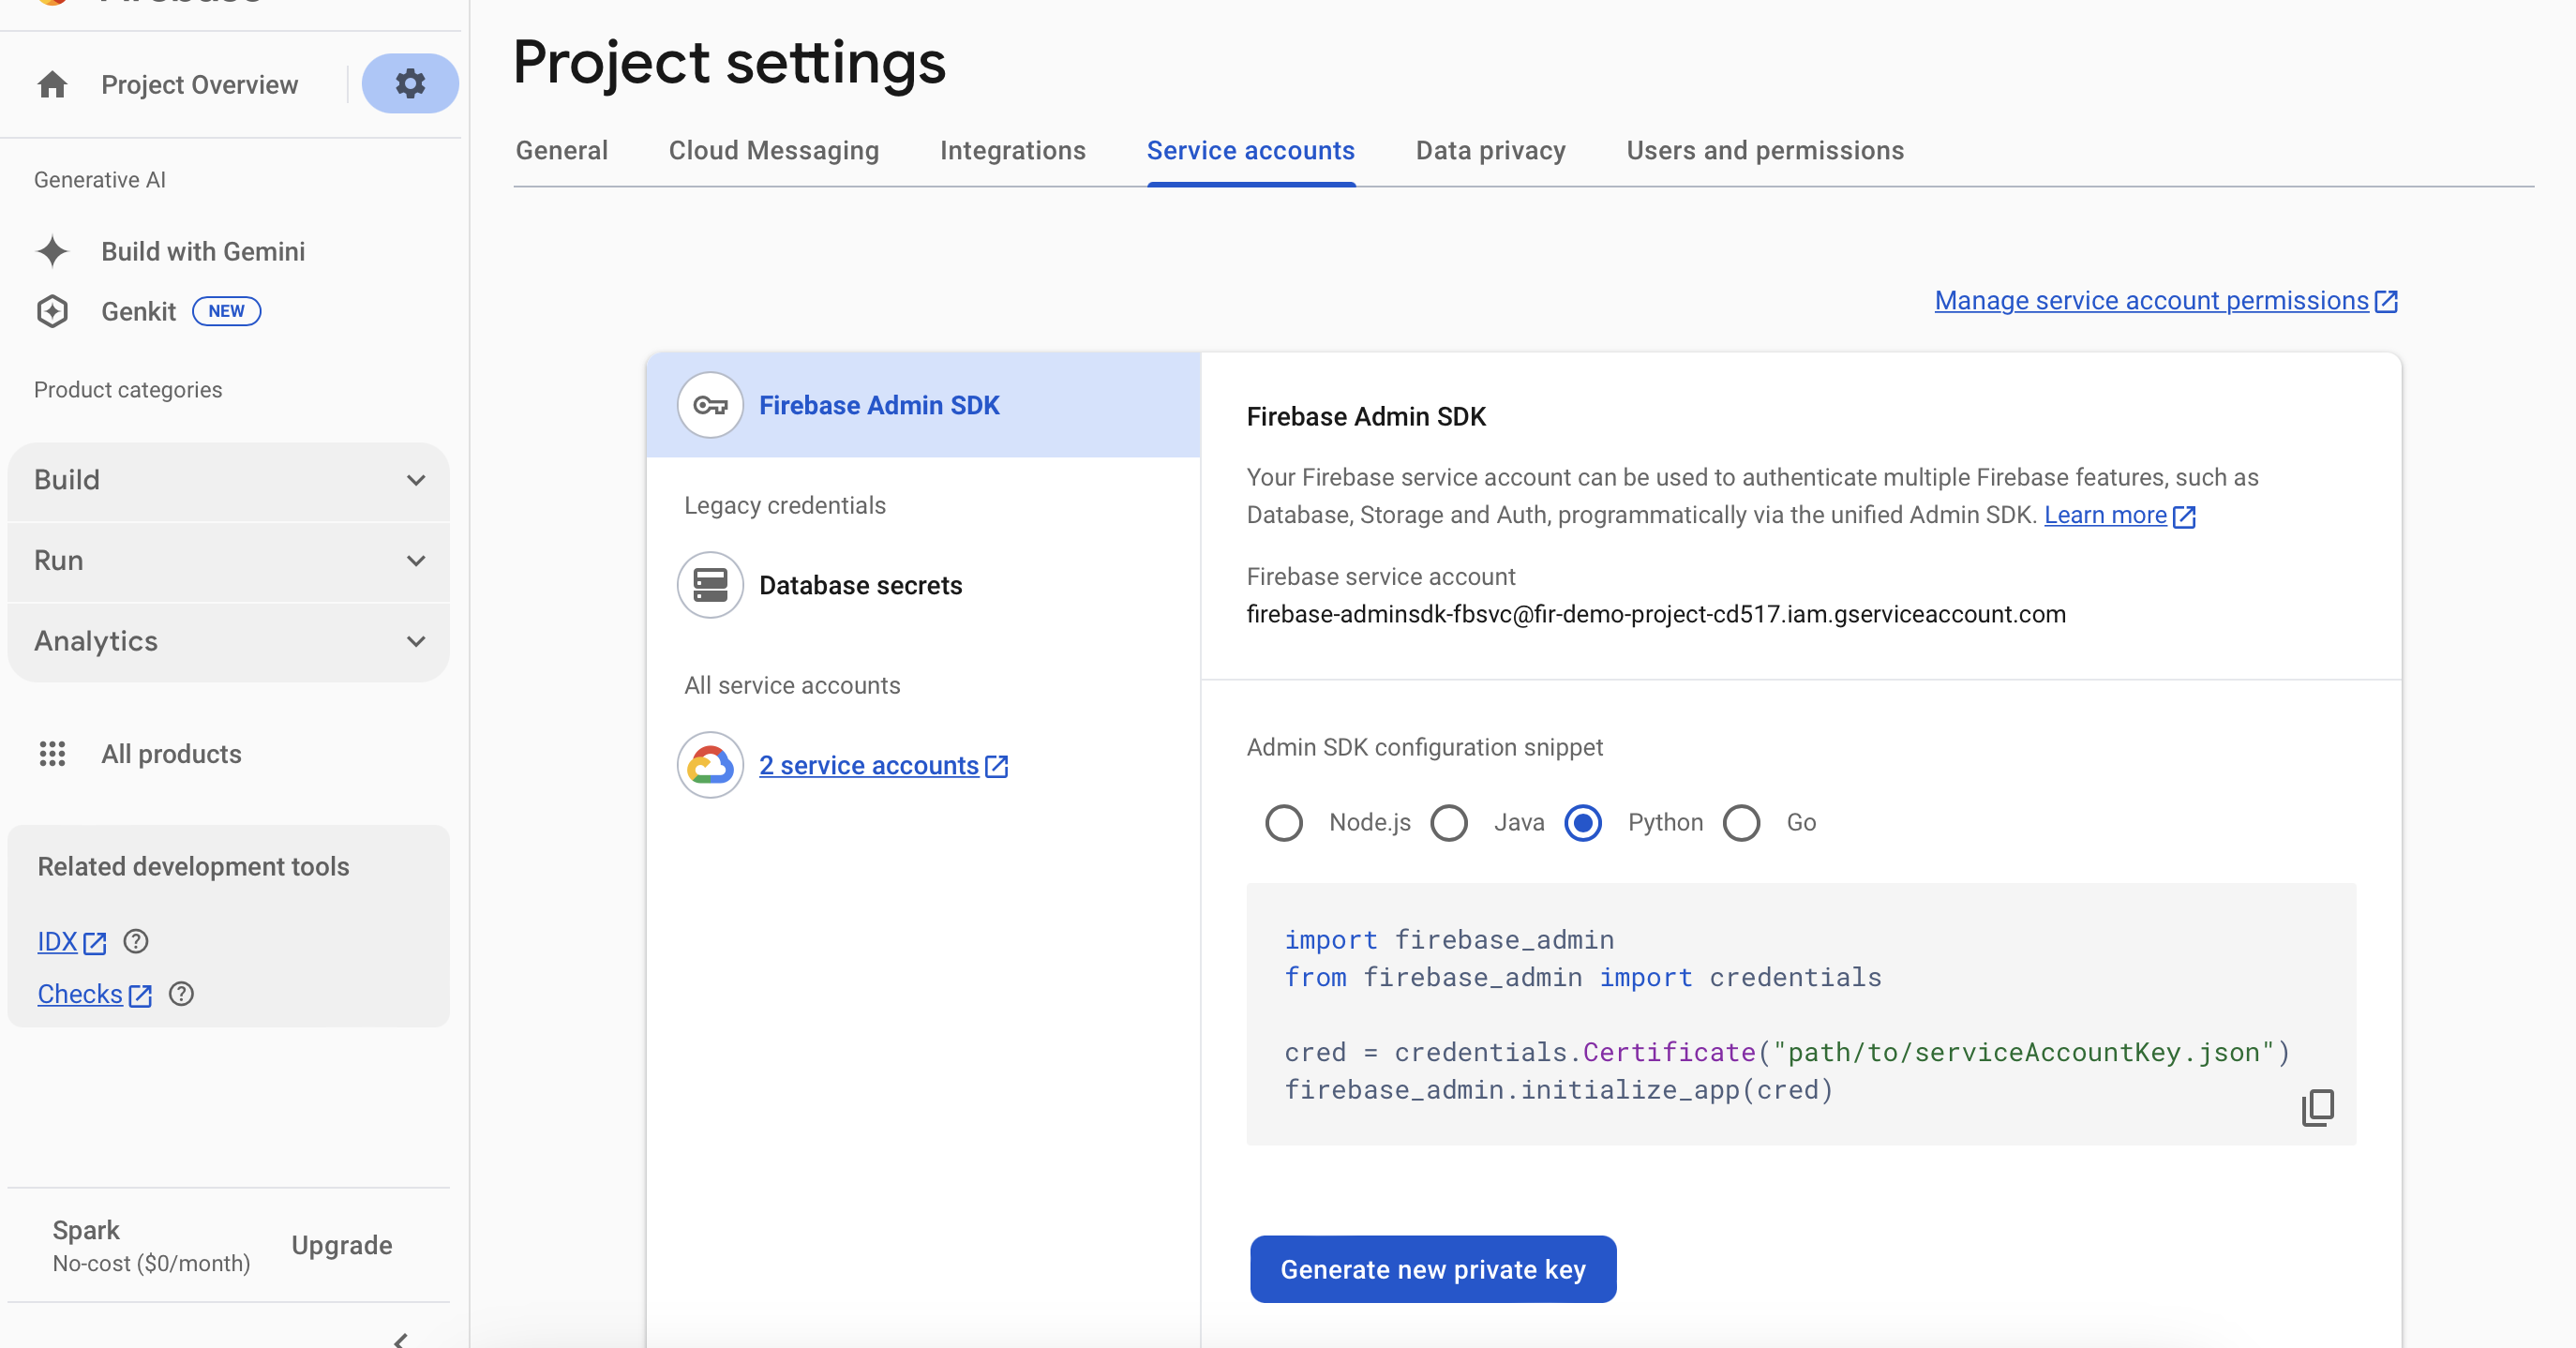

8. Download the json file an upload to this colab

9. Click on Build=>Firestore Database

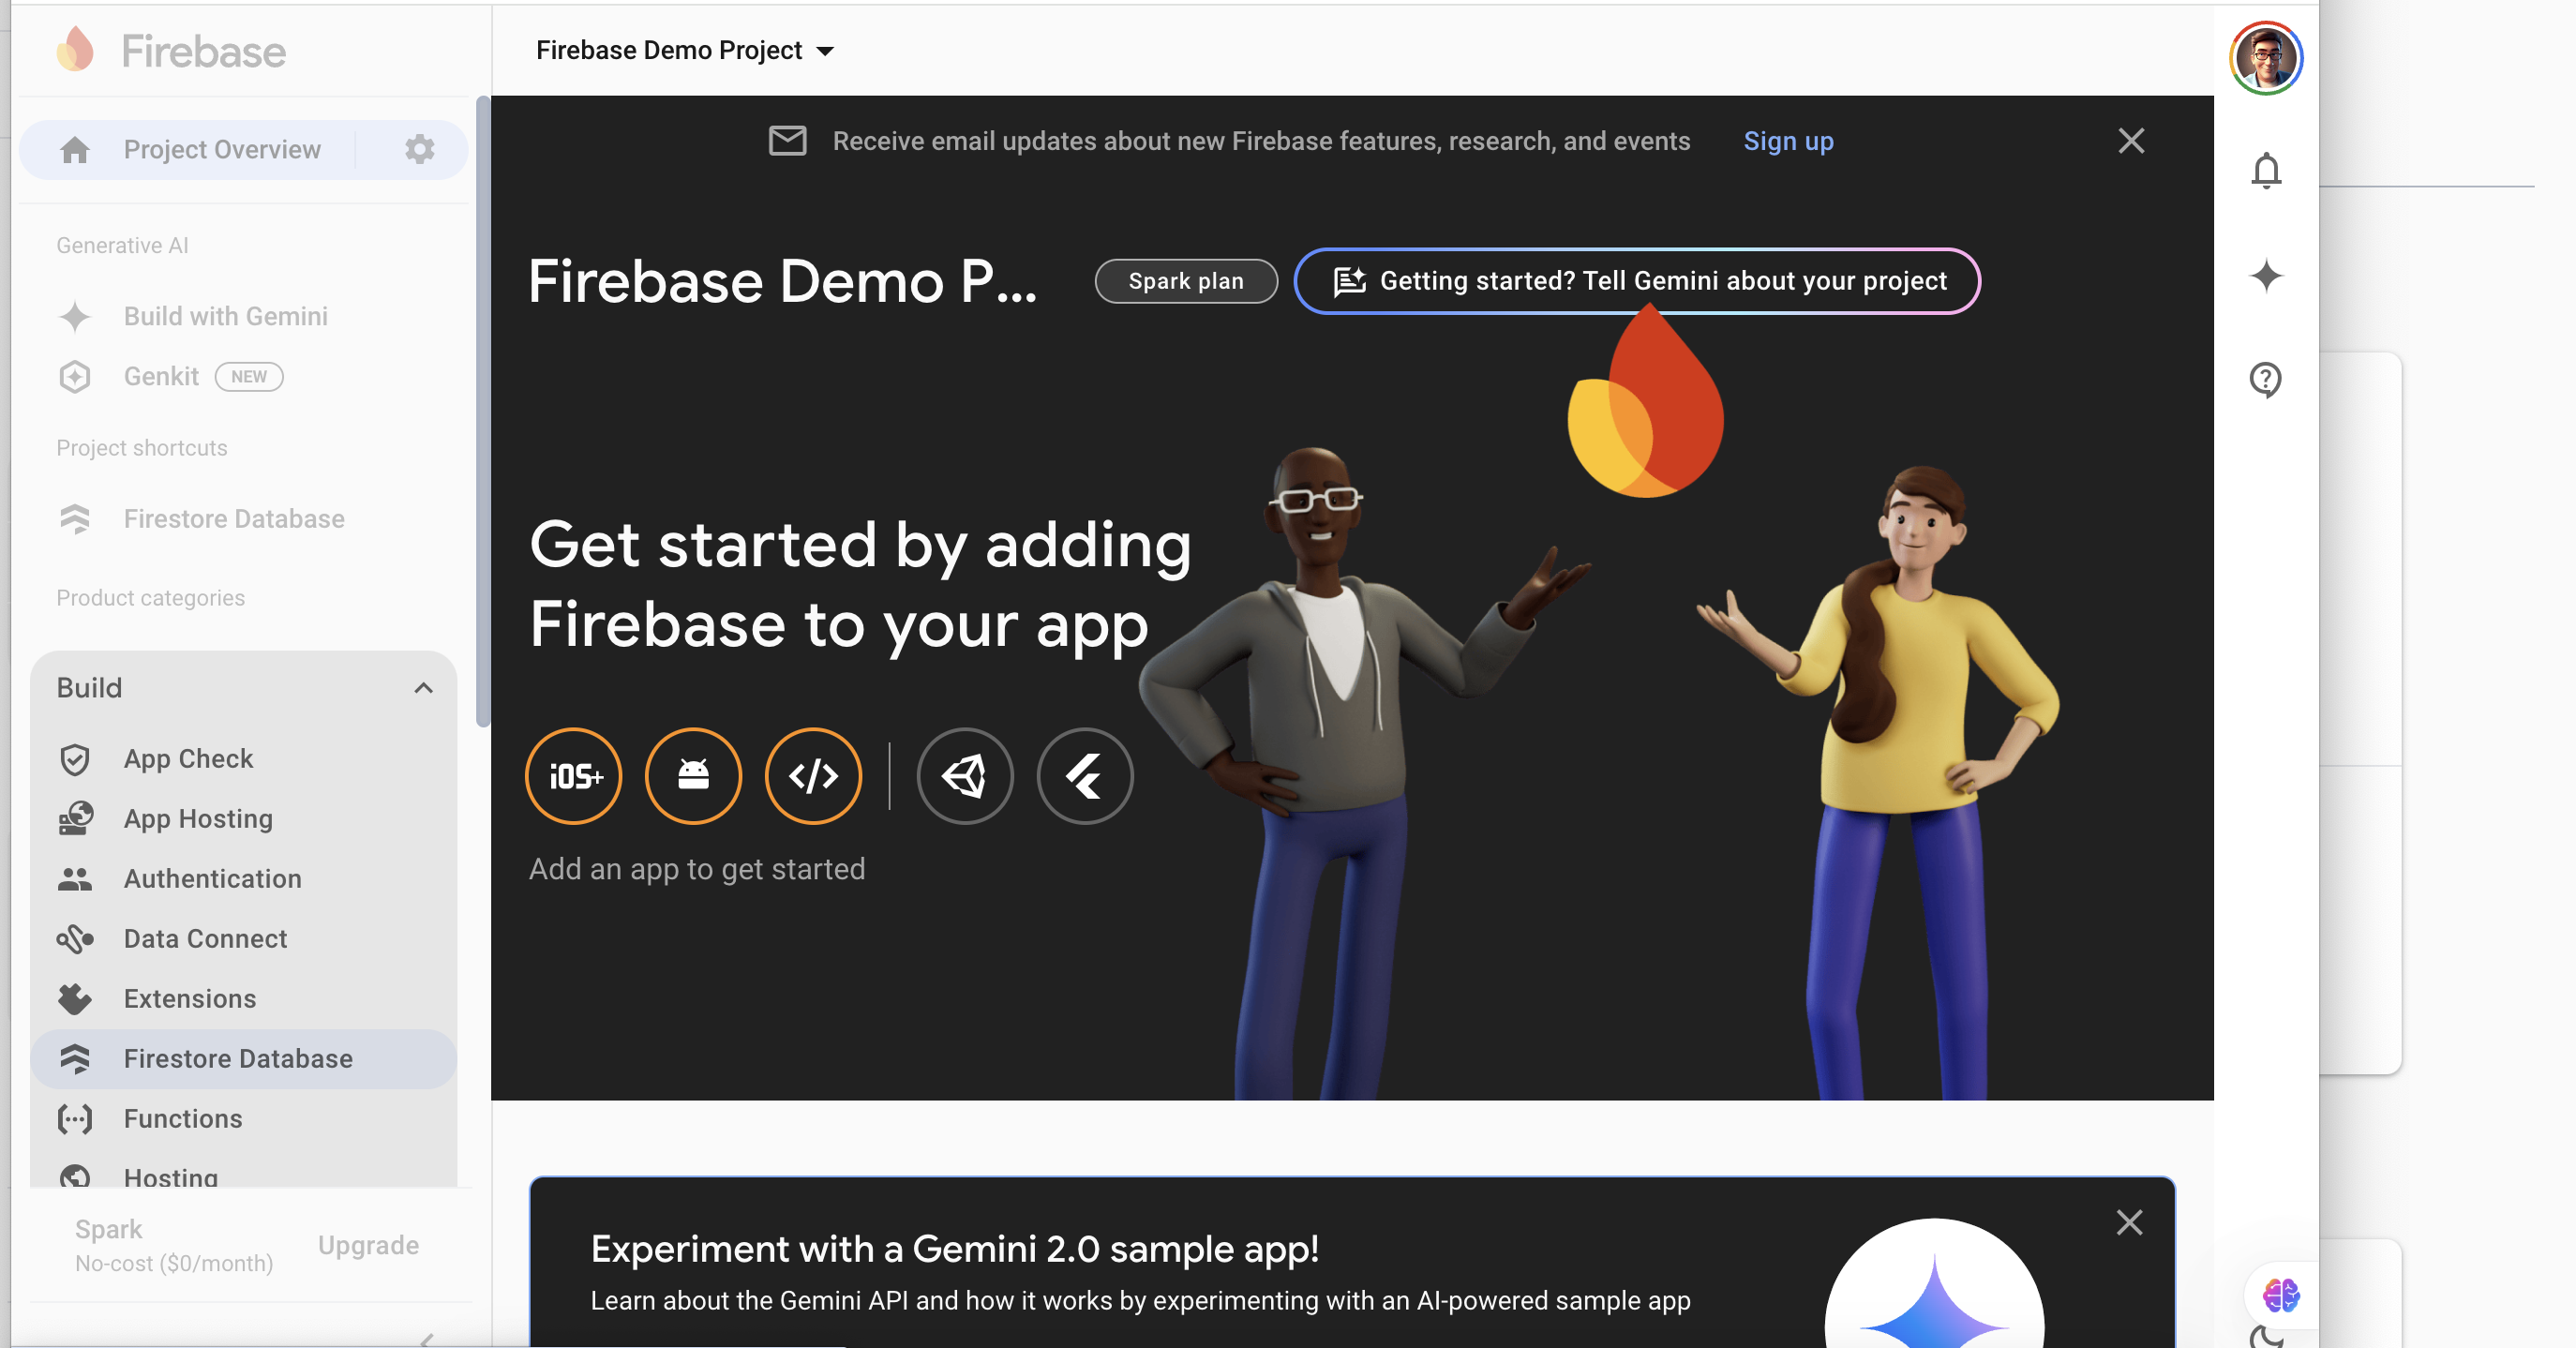

10. Click on Create database

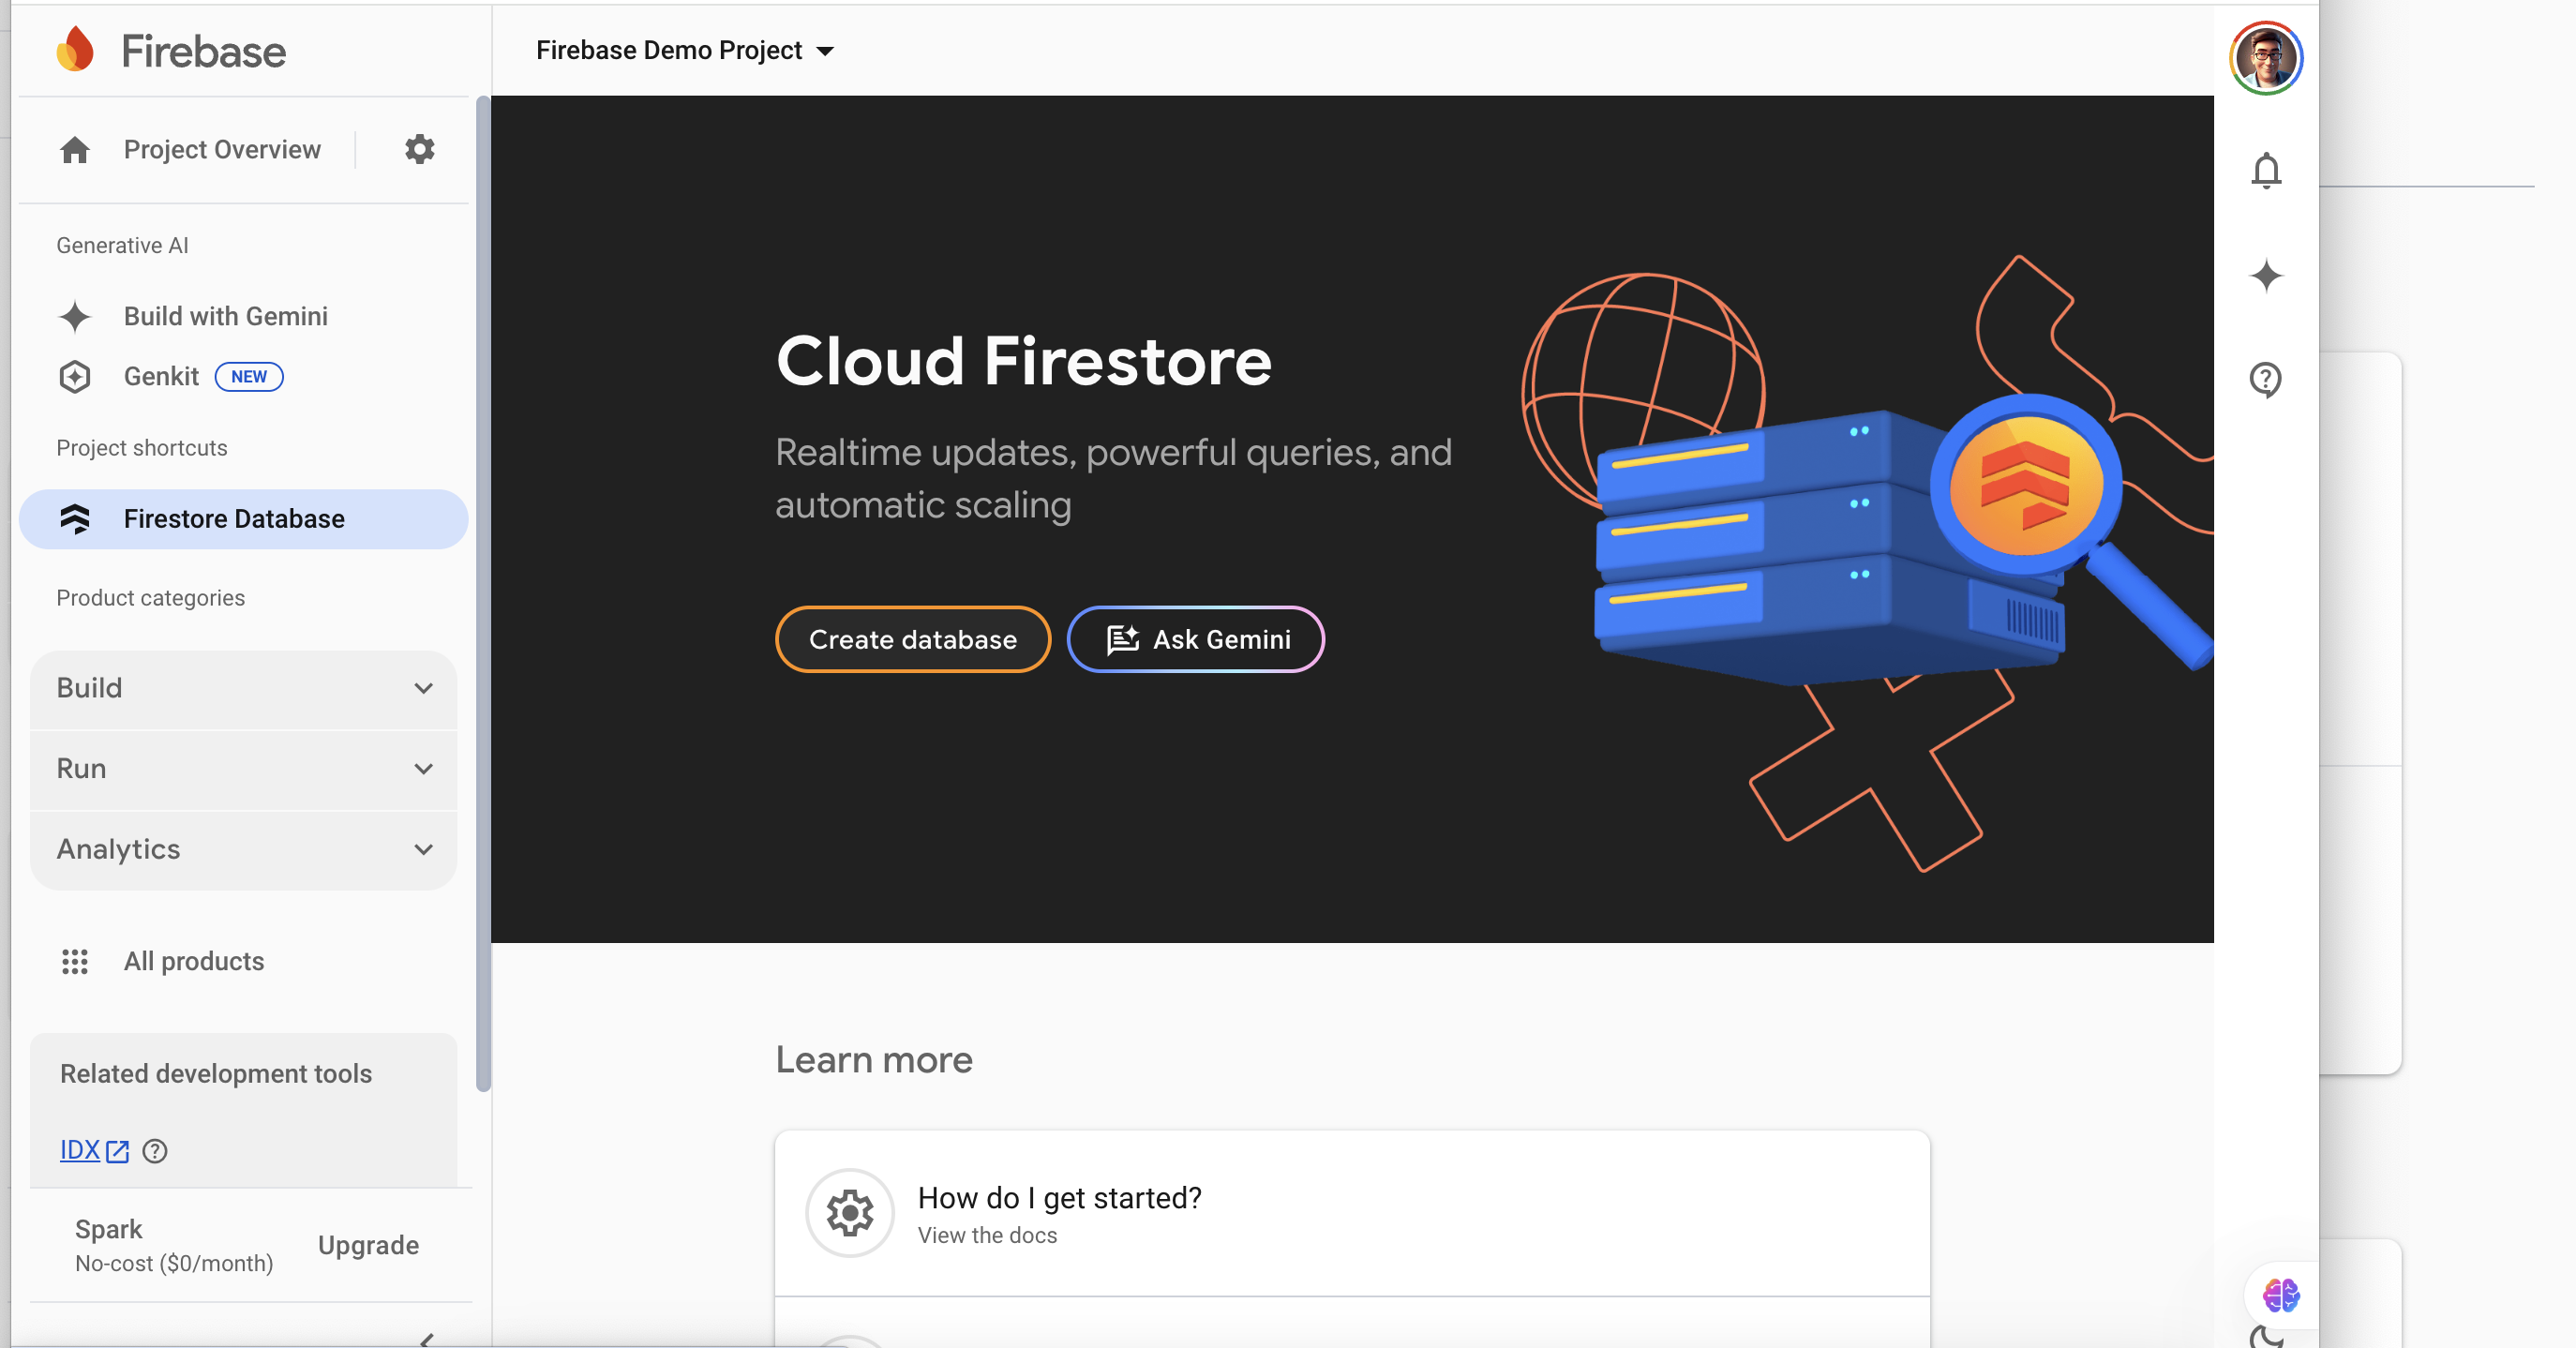

11. Choose start in test mode

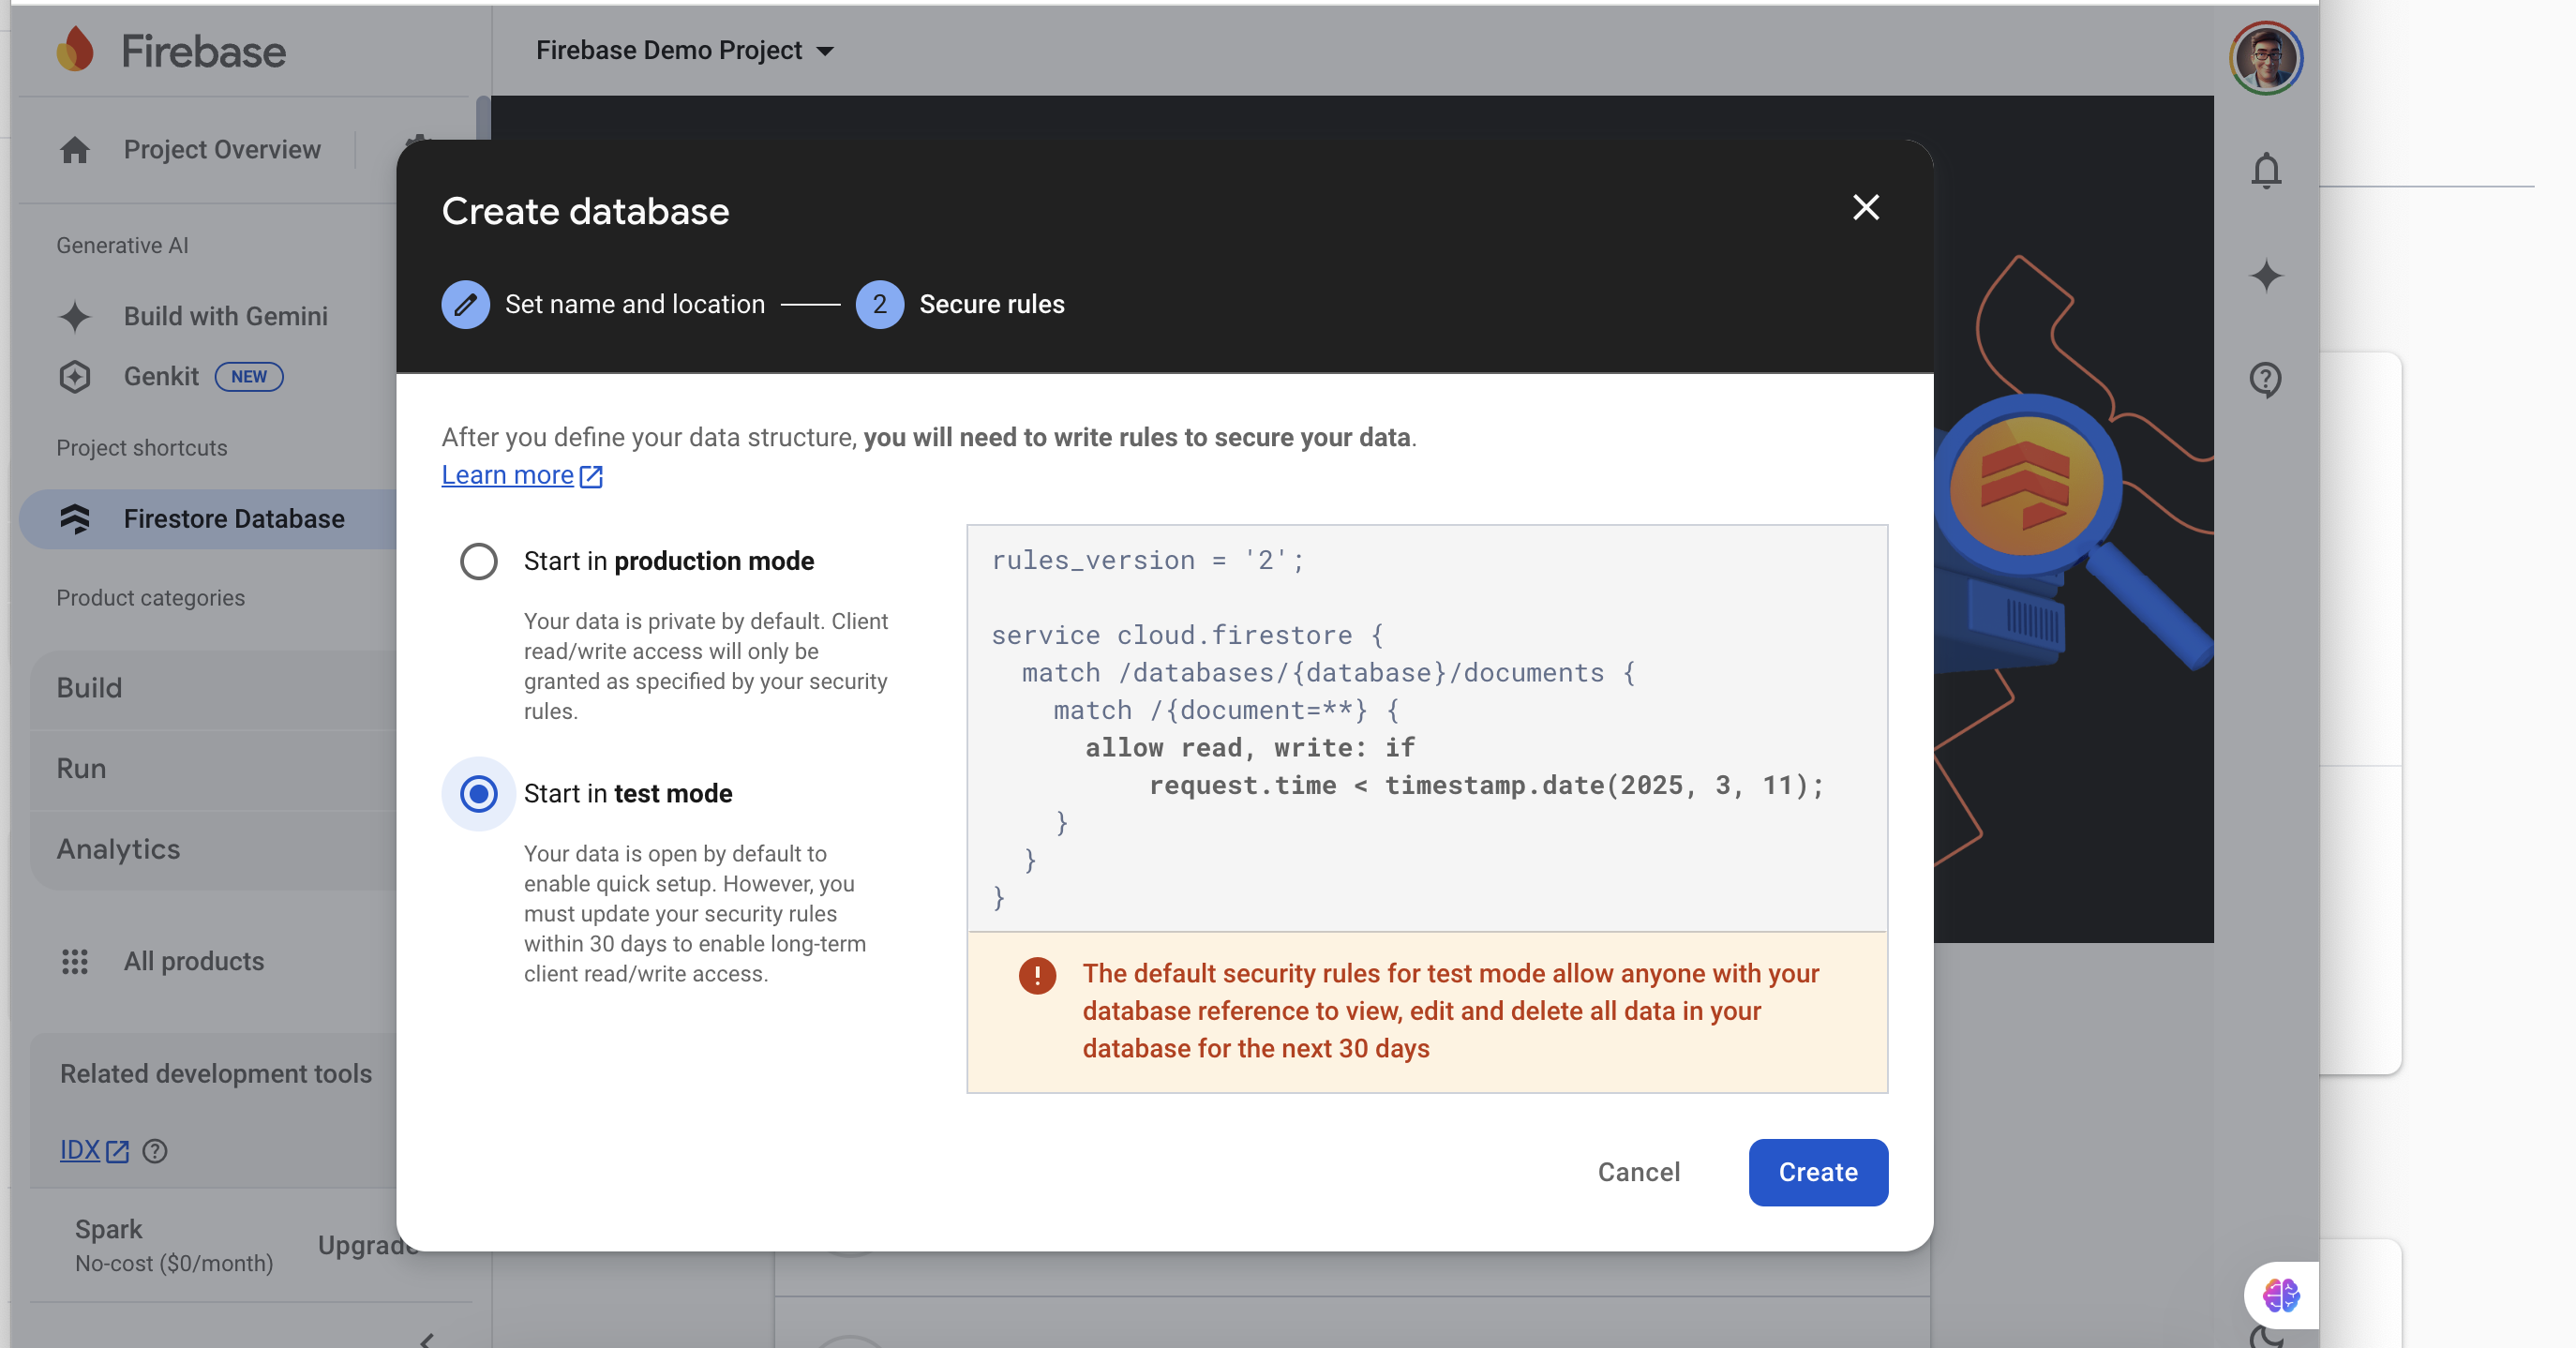

12. Run the codes below

# Working with python

**firebase-admin** is Firebase Admin Python SDK that enables server-side (backend) Python developers to integrate Firebase into their services and applications.

In [ ]:
! pip install firebase-admin

**To connect to firebase with certificate**

Create credential object of class `credentials.Certificate`.

**`firebase_admin.credentials.Certificate(cert)`** returns a credential initialized from JSON certificate keyfile.
*   `cert` : JSON certificate keyfile

**`firebase_admin.initialize_app(credential=None)`** initializes and returns new App instance.
*   `credentials` : credentials object

**`firestore.client(app=None, database_id=None)`** returns database client for interacting with Google Cloud Firestore API.
*   `app` : app instance (optional).
*   `database_id` : database ID of the Google Cloud Firestore database to be used. Defaults to the default Firestore database ID if not specified or an empty string (optional).




In [ ]:
import firebase_admin
from firebase_admin import credentials, firestore

# Create credentials from JSON certificate keyfile
cred = credentials.Certificate("fir-demo-project-9b47d-firebase-adminsdk-fbsvc-62a3b122ae.json")
# Initializes new App instance
firebase_admin.initialize_app(cred)

# Get database client for interacting with Google Cloud Firestore API
db = firestore.client()


## Firebase Operations

### Get reference to collection and document

**`db_client.collection(collection_path)`** gets a reference object of type `CollectionReference` to refer to a collection

*   `db_client` : database client
*   `collection_path` : path to collection

**`collectionReference.document(documentPath)`** gets a reference object of type `DocumentReference` to refer to a document

*   `collectionReference` : object of type `CollectionReference`
*   `documentPath` : path to document

### Create a collection and document

### 1. **`set()` Method**:

- **Purpose**: The `set()` method is used to write data to a document. If the document already exists, it **replaces** all existing fields in that document with the new data. If the document doesn’t exist, it **creates** a new document with the provided data.
  
- **Usage**: It requires a dictionary (key-value pairs) to specify the data you want to write to the document.

#### Example:
```python
doc_ref.set({
    "name": "John Doe",
    "email": "johndoe@example.com",
    "age": 30
})
```

- **Result**: The document will contain the fields:
  - `"name": "John Doe"`
  - `"email": "johndoe@example.com"`
  - `"age": 30`
  
If the document already exists, all existing fields are **overwritten** with the new data, and any old fields will be deleted.

---

### 2. **`update()` Method**:

- **Purpose**: The `update()` method allows you to update **specific fields** of an existing document without affecting the other fields. If the document doesn't exist, it will throw an error, unlike `set()`, which creates a new document if it doesn't exist.

- **Usage**: Like `set()`, it also uses a dictionary, but **only the fields specified in the dictionary will be updated**, leaving other fields intact.

#### Example:
```python
doc_ref.update({
    "age": 31
})
```

- **Result**: Only the `age` field of the document is updated to `31`. Other fields (like `name` and `email`) are **left unchanged**.
  
If the field does not exist, it will be **added** to the document, but **no other fields are affected**.



In [ ]:
# Create document reference to document "user_123" in collection "users"
doc_ref = db.collection("users").document("user_123")

# Write data in form of dictionary
# "name": "John Doe",
# "email": "johndoe@example.com",
# "age": 30
doc_ref.set(
    {
        "name": "John Doe",
        "email": "johndoe@example.com",
        "age": 30
    }
)

print("Data added successfully!")


Data added successfully!


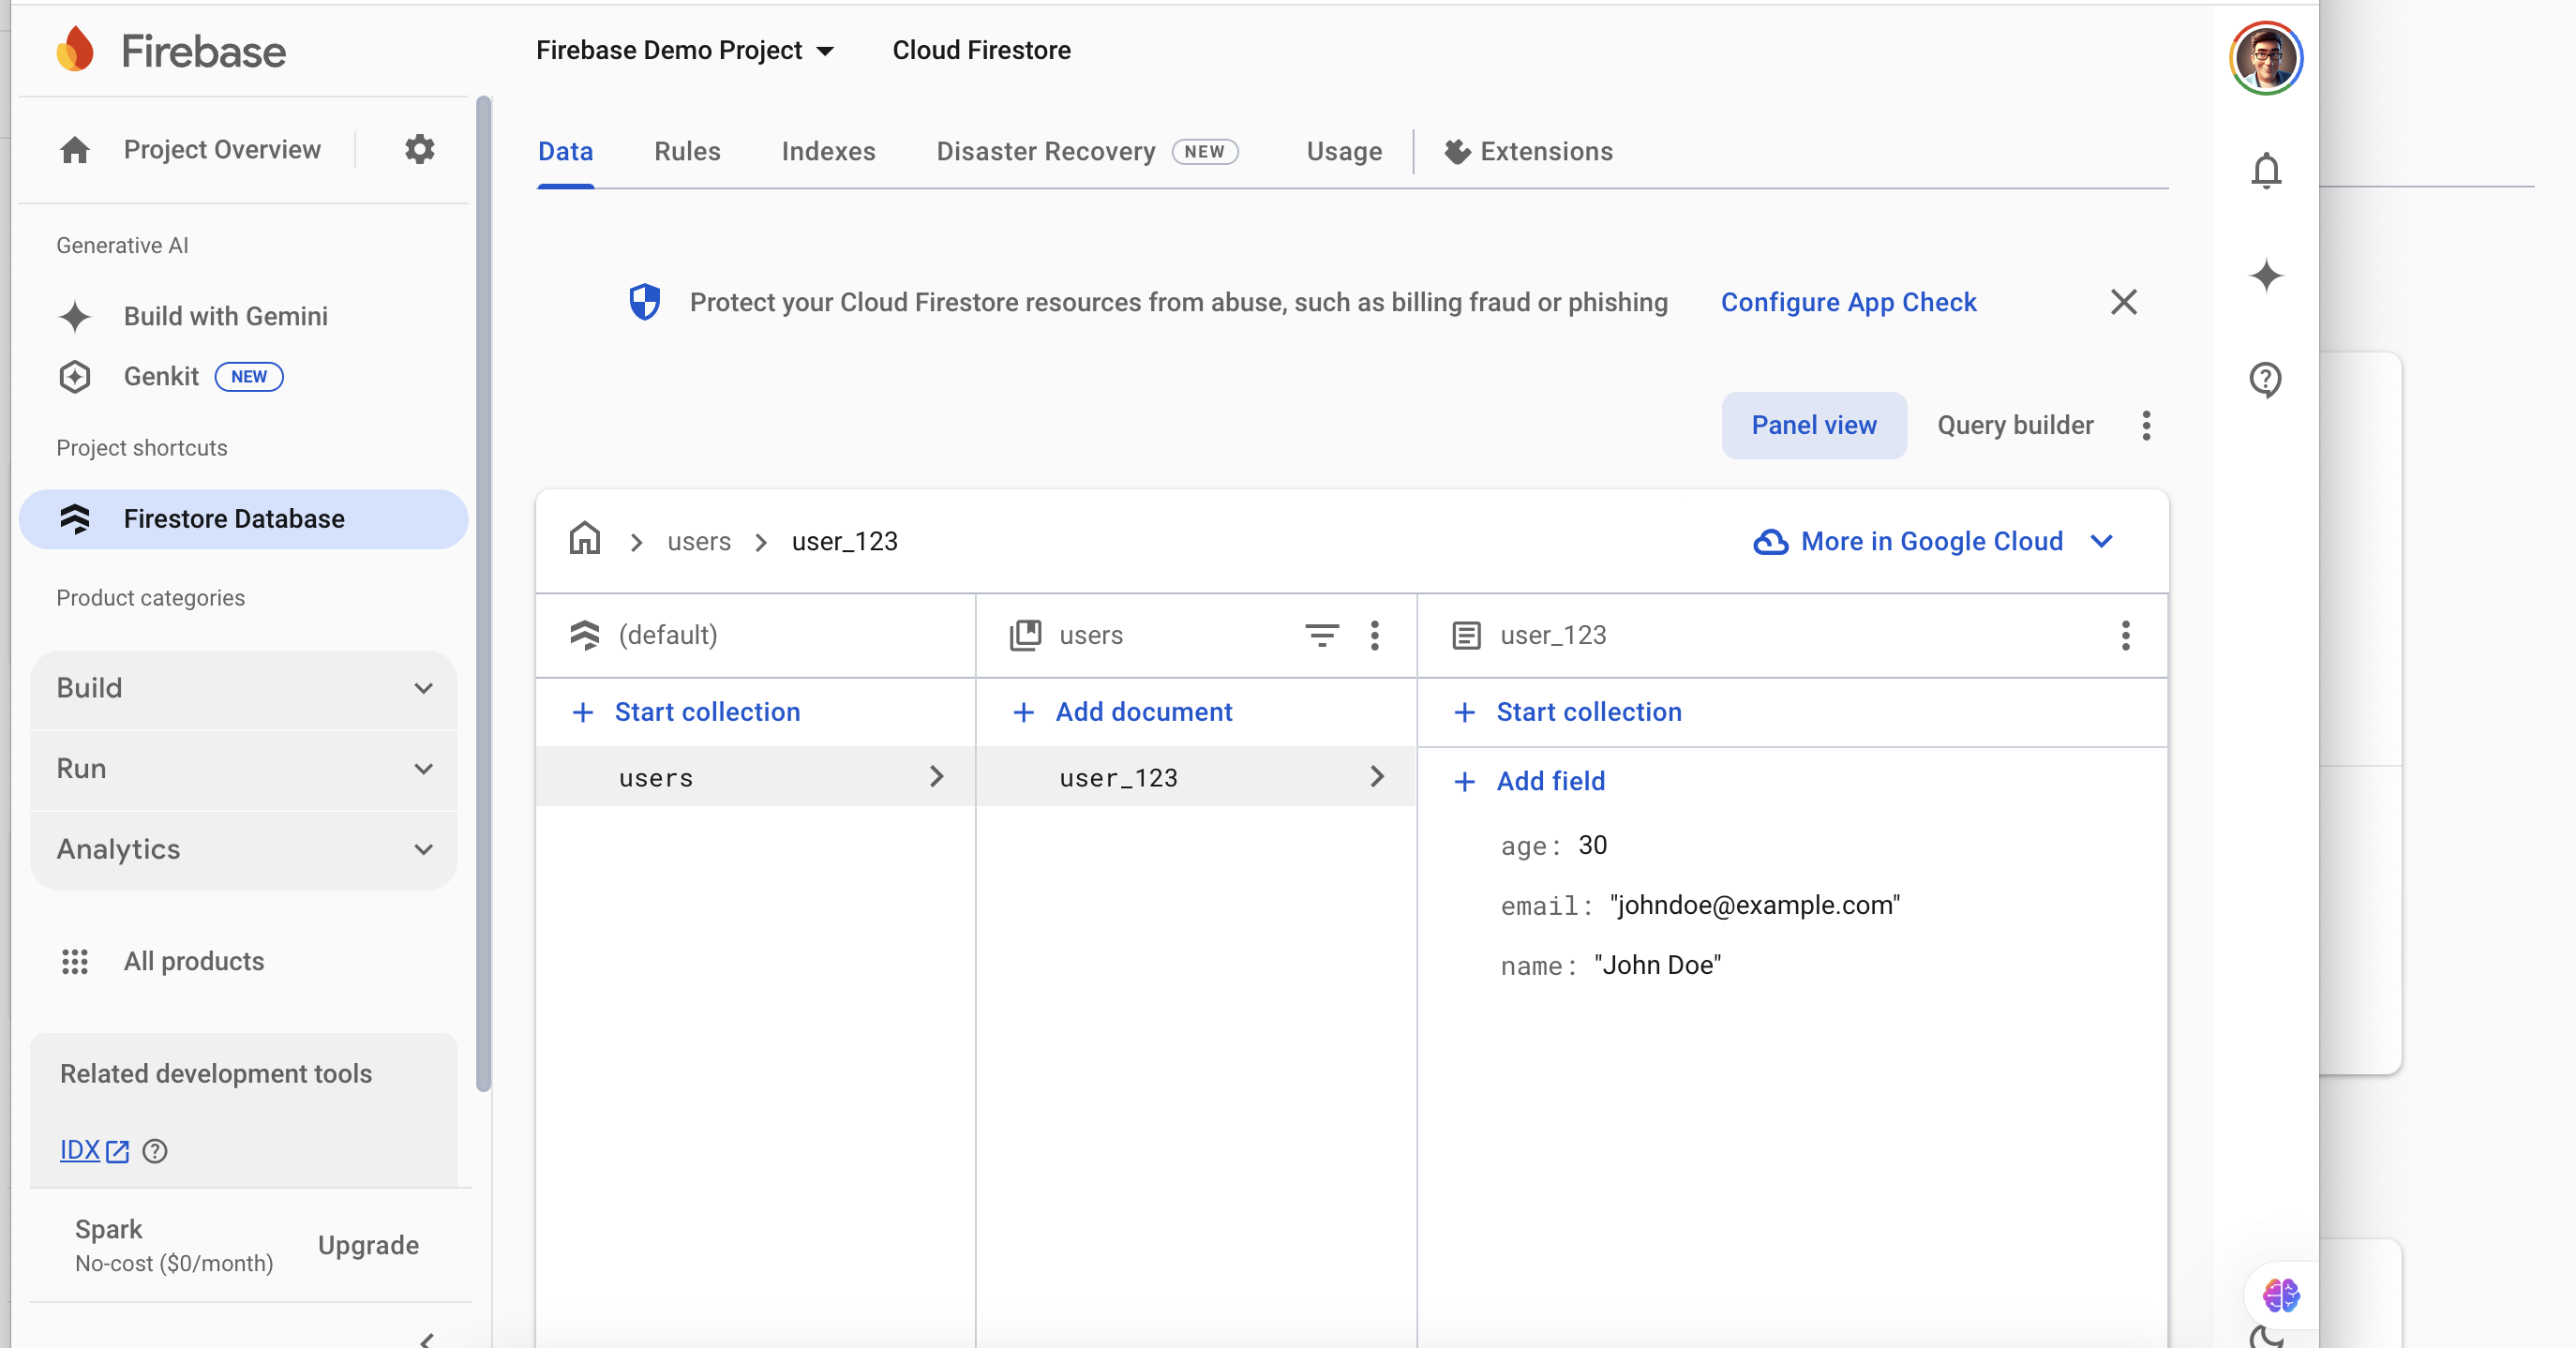

### Retrieve data

**`collectionReference.stream()`** reads the documents in this collection.
Returns generator that yields `DocumentSnapshot` objects.

**`docSnapshot.id`** returns document identifier.

**`docSnapshot.to_dict()`** retrieves data contained in this snapshot

In [ ]:
users_ref = db.collection('users')

# Read documents in users collection
docs = users_ref.stream()

# Iterate through generator that yields DocumentSnapshot
# Print doc id and data
for doc in docs:
    print(f'{doc.id} => {doc.to_dict()}')

# Use above doc_ref to update age to 32
print("-- Update document ---")
doc_ref.update({'age': 32})

# Read documents in users collection again
# Iterate through generator that yields DocumentSnapshot
docs = users_ref.stream()
for doc in docs:
    print(f'{doc.id} => {doc.to_dict()}')

user_123 => {'age': 30, 'email': 'johndoe@example.com', 'name': 'John Doe'}
-- Update document ---
user_123 => {'age': 32, 'email': 'johndoe@example.com', 'name': 'John Doe'}


### **Add more documents**

#### **`batch` Command**:

The `batch` command is used when you want to perform multiple Firestore operations (like `set()`, `update()`, and `delete()`) in a single, atomic transaction. This ensures that all the operations are either completed successfully or none of them are executed (if an error occurs).

### 1. **`batch` Initialization**:

```python
batch = db.batch()
```
- **Purpose**: The `batch` object is used to group multiple Firestore operations together. Once you initialize a batch, you can add operations like `set()`, `update()`, or `delete()` to it.
  
- **Important**: A batch operation allows you to write, update, or delete multiple documents **in one go**, and it is **atomic**. This means all operations will succeed or fail as a whole.

---

### 2. **Adding Operations to the Batch**:

```python
user_ref2 = db.collection('users').document('user_456')
user_ref3 = db.collection('users').document('user_789')

batch.set(user_ref2, {'name': 'Jane Smith', 'email': 'janesmith@example.com', 'age': 28})
batch.set(user_ref3, {'name': 'Alice Johnson', 'email': 'alicej@example.com', 'age': 35})
```

- **Creating Document References**:  
  - **`user_ref2`** and **`user_ref3`** are references to the documents you want to modify or create in the `users` collection.
  - **`db.collection('users').document('user_456')`**: Points to the document `"user_456"` in the `users` collection.
  - Similarly, **`user_ref3`** points to the document `"user_789"` in the same collection.

- **Adding Operations to the Batch**:  
  - **`batch.set()`**: This method is used to add a `set()` operation to the batch.
    - It writes data to the specified document. If the document already exists, it **replaces** its data with the new data provided.
    - If the document does not exist, it **creates** the document with the specified data.

  - For example, the line:
    ```python
    batch.set(user_ref2, {'name': 'Jane Smith', 'email': 'janesmith@example.com', 'age': 28})
    ```
    adds a `set()` operation to the batch for the document `"user_456"`. It will either **create** the document (if it doesn't exist) or **overwrite** the existing document with the new data.

  - Similarly, the line:
    ```python
    batch.set(user_ref3, {'name': 'Alice Johnson', 'email': 'alicej@example.com', 'age': 35})
    ```
    adds a `set()` operation to the batch for the document `"user_789"`.

---

### 3. **Committing the Batch**:

```python
batch.commit()
```
- **Purpose**: The `commit()` method is used to **execute** all the operations added to the batch.
- **Atomic Execution**: All operations within the batch are executed in one go. If there is an error with any operation, none of the operations in the batch will be committed, ensuring atomicity.
  


In [ ]:
# Initialize a batch
batch = db.batch()

# Create document reference to document 'user_456' in collection 'users'
# Create document reference to document 'user_789' in collection 'users'
user_ref2 = db.collection('users').document('user_456')
user_ref3 = db.collection('users').document('user_789')

# Add set operations to batch
# Write data {'name': 'Jane Smith', 'email': 'janesmith@example.com', 'age': 28} to doc 'user_456'
# Write data {'name': 'Alice Johnson', 'email': 'alicej@example.com', 'age': 35} to doc 'user_789'
batch.set(user_ref2, {'name': 'Jane Smith', 'email': 'janesmith@example.com', 'age': 28})
batch.set(user_ref3, {'name': 'Alice Johnson', 'email': 'alicej@example.com', 'age': 35})

# Commit the batch
batch.commit()

print("Users added successfully!")


Users added successfully!


In [ ]:
# Query all documents in collection
docs = users_ref.stream()

for doc in docs:
    print(f'{doc.id} => {doc.to_dict()}')

user_123 => {'age': 32, 'email': 'johndoe@example.com', 'name': 'John Doe'}
user_456 => {'age': 28, 'email': 'janesmith@example.com', 'name': 'Jane Smith'}
user_789 => {'age': 35, 'email': 'alicej@example.com', 'name': 'Alice Johnson'}


### **Read documents**

To read data from Firestore, you can use the `get()` method. This allows you to retrieve documents from a collection or a specific document.

You can use Firestore's `collection().document()` to target a specific document or just `collection()` to retrieve all documents within a collection.

- **Getting a specific document**:  
  You can use the `document()` method to retrieve a specific document.
  
- **Getting all documents in a collection**:  
  If you want to retrieve all documents in a collection, you use the `get()` method on the `collection` reference.

After fetching the document(s), you can extract the data using `.to_dict()` method, which converts the document snapshot into a Python dictionary.

---

**1. Read a Single Document**:

If you want to read a specific document (for example, `"user_123"`), you would use the `document()` method and `get()` to fetch the document.

#### Example Code for Reading a Single Document:

```python
doc_ref = db.collection('users').document('user_123')

doc_snapshot = doc_ref.get()

if doc_snapshot.exists:
    user_data = doc_snapshot.to_dict()
    print(f"User Data: {user_data}")
else:
    print("Document not found")
```

---

**2. Read All Documents in a Collection**:

If you want to retrieve all documents in the `users` collection, you can use the `get()` method on the collection reference.

#### Example Code for Reading All Documents:

```python
users_ref = db.collection('users')

docs = users_ref.get()

for doc in docs:
    user_data = doc.to_dict()
    print(f"User ID: {doc.id}, Data: {user_data}")
```



In [ ]:
# Create document reference to document 'user_123' in collection 'users'
# Get document snapshot
doc_ref = db.collection('users').document('user_123')
doc_snapshot = doc_ref.get()

# Check if document exists
# Print document if document snapshot exists
if doc_snapshot.exists:
    user_data = doc_snapshot.to_dict()
    print(f"User Data: {user_data}")
else:
    print("Document not found")


User Data: {'age': 32, 'email': 'johndoe@example.com', 'name': 'John Doe'}


In [ ]:
# Create collection reference to collection 'users'
# Get all documents in the collection
users_ref = db.collection('users')
docs = users_ref.get()

# Iterate through documents and print their data
# Print all documents in query snapshot
for doc in docs:
    user_data = doc.to_dict()
    print(f"User ID: {doc.id}, Data: {user_data}")


User ID: user_123, Data: {'age': 32, 'email': 'johndoe@example.com', 'name': 'John Doe'}
User ID: user_456, Data: {'age': 28, 'email': 'janesmith@example.com', 'name': 'Jane Smith'}
User ID: user_789, Data: {'age': 35, 'email': 'alicej@example.com', 'name': 'Alice Johnson'}


**3. Reading using conditions**

1. **`where()`**: Filters documents based on a field value.
2. **`order_by()`**: Orders the documents based on a field.
3. **`limit()`**: Limits the number of documents returned by the query.
4. **`get()`**: Retrieves the documents that match the query.

In [ ]:
# Create collection reference to collection 'users'
users_ref = db.collection('users')

# Query documents with age >= 30
query = users_ref.where('age', '>=', 30)

# Get documents that match the query
docs = query.get()

# Print all documents in query snapshot
for doc in docs:
    user_data = doc.to_dict()
    print(f"User ID: {doc.id}, Data: {user_data}")


/usr/local/lib/python3.11/dist-packages/google/cloud/firestore_v1/base_collection.py:303: UserWarning: Detected filter using positional arguments. Prefer using the 'filter' keyword argument instead.
  return query.where(field_path, op_string, value)


User ID: user_123, Data: {'age': 32, 'email': 'johndoe@example.com', 'name': 'John Doe'}
User ID: user_789, Data: {'age': 35, 'email': 'alicej@example.com', 'name': 'Alice Johnson'}


In [ ]:
from google.cloud.firestore_v1.base_query import FieldFilter

# Using filter, query documents with age >= 30 and <=34
# with Multiple Conditions, filter= should be explicitly used instead of passing arguments directly into .where()
query = users_ref.where(filter=FieldFilter('age', '>=', 30)).where(filter=FieldFilter('age', '<=', 34))

# Get documents that match the query
docs = query.get()

# Print all documents in query snapshot
for doc in docs:
    user_data = doc.to_dict()
    print(f"User ID: {doc.id}, Data: {user_data}")

User ID: user_123, Data: {'age': 32, 'email': 'johndoe@example.com', 'name': 'John Doe'}


In [ ]:
from google.cloud.firestore_v1.base_query import FieldFilter

# Query all documents order by age
query = users_ref.order_by('age')

# Get documents that match the query
docs = query.get()

# Print all documents in query snapshot
for doc in docs:
    user_data = doc.to_dict()
    print(f"User ID: {doc.id}, Data: {user_data}")

User ID: user_456, Data: {'age': 28, 'email': 'janesmith@example.com', 'name': 'Jane Smith'}
User ID: user_123, Data: {'age': 32, 'email': 'johndoe@example.com', 'name': 'John Doe'}
User ID: user_789, Data: {'age': 35, 'email': 'alicej@example.com', 'name': 'Alice Johnson'}


In [ ]:
from google.cloud.firestore_v1.base_query import FieldFilter

# Query all documents order by age with limit to 2
query = users_ref.order_by('age').limit(2)

# Get documents that match the query
docs = query.get()

# Print all documents in query snapshot
for doc in docs:
    user_data = doc.to_dict()
    print(f"User ID: {doc.id}, Data: {user_data}")

User ID: user_456, Data: {'age': 28, 'email': 'janesmith@example.com', 'name': 'Jane Smith'}
User ID: user_123, Data: {'age': 32, 'email': 'johndoe@example.com', 'name': 'John Doe'}


### **Delete Documents**



**1. Deletion of a Single Document**

```
doc_ref = db.collection('users').document('user_123')

doc_ref.delete()

print("Document deleted successfully!"
```

**2. Batch Deletion**

```
batch = db.batch()

users_ref = db.collection('users')
docs = users_ref.stream()

for doc in docs:
    batch.delete(doc.reference)

batch.commit()
```

In [ ]:
# Delete document 'user_123'
doc_ref = db.collection('users').document('user_123')
doc_ref.delete()

print("Document deleted successfully!")

# Query all remaining documents
user_ref = db.collection('users')
docs = user_ref.stream()

for doc in docs:
    print(doc.to_dict())

Document deleted successfully!
{'age': 28, 'email': 'janesmith@example.com', 'name': 'Jane Smith'}
{'age': 35, 'email': 'alicej@example.com', 'name': 'Alice Johnson'}


In [ ]:
# Create batch
batch = db.batch()

# Query all documents and delete each of them
users_ref = db.collection('users')
docs = users_ref.stream()

for doc in docs:
    batch.delete(doc.reference)

# Commit batch
batch.commit()

# Query all remaining documents
user_ref = db.collection('users')
docs = user_ref.stream()

for doc in docs:
    print(doc.to_dict())
